In [1]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


![](https://i.imgur.com/ARikdFw.jpg)

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:#15C3BA'>1 ❯</span></b> <b>BACKGROUND</b></div>


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER FINANCIAL TRANSACTIONS</b>

- This task is based on synthesised trasaction dataset, containing **<span style='color:#15C3BA'>3 months worth of transactions</span>** for **<span style='color:#15C3BA'>100 hypothetical customers</span>** 
- It contains **<span style='color:#15C3BA'>purchases</span>**, **<span style='color:#15C3BA'>recurring transactions</span>** & **<span style='color:#15C3BA'>salary transactions</span>**
- The dataset is designed to simulate realistic transaction bahaviours that are observed in ANZ's read transaction data
- So many of the insights you gather from the task below will be a genuine reflection of a realistic dataset

### <b><span style='color:#15C3BA;text-align:center'>★ </span>DATA@ANZ TASKS</b>

There are quite a few **[tasks](https://www.theforage.com/virtual-internships/prototype/ZLJCsrpkHo9pZBJNY/ANZ-Virtual-Internship)** that are given, we'll focus on the two main ones:

#### **TASK I : EXPLORATORY DATA ANALYSIS**

- **<span style='color:#15C3BA'>Segment</span>** the dataset and draw unique insights, including visualisation of the **<span style='color:#15C3BA'>transaction volume</span>** and assessing the **<span style='color:#15C3BA'>effect of any outliers</span>**
- The dataset is by no means complete, however it gives us enough information to provide some kind of recommendation for various groups of customers
- An interesting **[article](https://www.anz.com.au/personal/bank-accounts/tips-and-guides/spend-habits/track-your-spend/)** outlines the possible reasons we may be interested in analysing **client transaction** data
- The focus in this case is to try to build a model that will enable us to predict **annual salary**
- For this we probably have to do a thorough EDA & create additional features, in addition to what we are given

#### **TASK II : ANNUAL SALARY PREDICTION**

- Using the same transaction dataset, **<span style='color:#15C3BA'>identify the annual salary for each customer</span>**
- Explore **<span style='color:#15C3BA'>correlations</span>** between **<span style='color:#15C3BA'>annual salary</span>** and **<span style='color:#15C3BA'>various customer attributes (eg. ages)</span>**
    - These attributes could be those that are readily available in the data or those you construct or derive yourself (eg. relating to purchasing behaviour)
- Visualise any interesting correlations using a scatterplot
- Build a simple regression **<span style='color:#15C3BA'>model to predict the annual salary</span>** for each customer using the attributes you identified above
- How accurate is your model? **<span style='color:#15C3BA'>Should ANZ use it to segment customers</span>** (for whom it does not have this data) into brackets for reporting purposes?
- For a challenge: build a **<span style='color:#15C3BA'>decision tree based model</span>** to predict salary, does it perform better? How would you accurately test the performance of this model?

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>NOTEBOOK AIM</b>

In this notebook:

- We will focus on the main task at hand; **<span style='color:#15C3BA'>generating the target variable</span>** for the problem & create a model that will be able to predict the **<span style='color:#15C3BA'>annual income</span>** of customers
- A comprehensive **<span style='color:#15C3BA'>EDA</span>** will follow, in which we will do a **<span style='color:#15C3BA'>simple segmentation</span>** of customers & make some recommendations based on what we will find out in our investigation 
- **<span style='color:#15C3BA'>Feature engineering</span>** will be an important part of this notebook, we'll continuously try to find features that will improve our model as we will be utilising an agile methodology

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>2 ❯</span></b> <b>ANZ CUSTOMER TRANSACTION DATASET</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>QUICK INSPECTION</b>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>WE HAVE A LOT OF MERCHANT FEATURES</b>

Upon initial inspection of the dataframe, we can notice simiarly named features:

- <code>merchant_long_lat</code> needs to be split into two columns, separated by " "
- We'll do the same thing to feature <code>long_lat</code>


> **<span style='color:#15C3BA'>Merchant</span>** services refer to the software, hardware and services that are used by businesses to accept credit and debit card payments:
> - Standalone **<span style='color:#15C3BA'>EFTPOS machines</span>** <br>
> - **EFTPOS** machines that are integrated with a point of sale (POS) system <br>
> - **<span style='color:#15C3BA'>Online payment systems</span>** including payment gateways <br>

- A **<span style='color:#15C3BA'>merchant</span>** is the acceptor of payments
- When a consumer pays a merchant for goods and/or services, either online or in-store, the payment is initiated via a swipe, dip, tap, scan or click. - **[source](https://www.knowyourpayments.com/transaction-basics/)**




#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>READ DATASET</b>

The dataset with the additional features has been updated and can be found below

In [2]:
!wget https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/ANZ_internship/anz_data.csv

--2023-08-02 07:37:59--  https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/ANZ_internship/anz_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2797503 (2.7M) [text/plain]
Saving to: ‘anz_data.csv’

anz_data.csv        100%[===================>]   2.67M  --.-KB/s    in 0.08s   

2023-08-02 07:37:59 (34.6 MB/s) - ‘anz_data.csv’ saved [2797503/2797503]



In [3]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns; sns.set(style='whitegrid')
import matplotlib.pyplot as plt
plotly.offline.init_notebook_mode(connected=True)
import warnings; warnings.filterwarnings('ignore')

# df = pd.read_csv('/kaggle/input/anz-synthesised-transaction-dataset/data_anz.csv')
df = pd.read_csv('/kaggle/working/anz_data.csv')
df.head(5)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,...,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,...,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65


In [4]:
df.T.sort_index().T.columns

Index(['account', 'age', 'amount', 'annual_salary', 'balance', 'bin_age',
       'card_present_flag', 'customer_id', 'date', 'day', 'dow', 'first_name',
       'gender', 'hour', 'latitude', 'longitude', 'merchant_code',
       'merchant_id', 'merchant_latitude', 'merchant_longitude',
       'merchant_state', 'merchant_suburb', 'minute', 'month', 'movement',
       'payment_period', 'status', 'transaction_id', 'txn_description',
       'year'],
      dtype='object')

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>FEATURE DATATYPES</b>

We can change some of the data types, eg. `date` & `extraction` to `datetime` so we can **extract some data from this feature** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             12043 non-null  object 
 1   age                 12043 non-null  int64  
 2   amount              12043 non-null  float64
 3   balance             12043 non-null  float64
 4   card_present_flag   7717 non-null   float64
 5   customer_id         12043 non-null  object 
 6   date                12043 non-null  object 
 7   first_name          12043 non-null  object 
 8   gender              12043 non-null  object 
 9   latitude            12043 non-null  float64
 10  longitude           12043 non-null  float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         7717 non-null   object 
 13  merchant_latitude   7717 non-null   float64
 14  merchant_longitude  7717 non-null   float64
 15  merchant_state      7717 non-null   object 
 16  merc

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>DATASET STATISTICS</b>

The dataset contains `balance`, `age` & `amount` features, which correspond to the **<span style='color:#15C3BA'>account balance</span>**, **<span style='color:#15C3BA'>age</span>** and **<span style='color:#15C3BA'>payment ammount</span>** (all transactions made)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,12043.0,30.582330,10.046343,18.000000,22.000,28.000,38.000,78.000
amount,12043.0,187.933588,592.599934,0.100000,16.000,29.000,53.655,8835.980
balance,12043.0,14704.195553,31503.722652,0.240000,3158.585,6432.010,12465.945,267128.520
card_present_flag,7717.0,0.802644,0.398029,0.000000,1.000,1.000,1.000,1.000
latitude,12043.0,-38.164347,54.622791,-573.000000,-37.700,-33.890,-30.750,-12.370
longitude,12043.0,143.648563,16.669352,114.620000,138.690,145.230,151.220,255.000
merchant_code,883.0,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000
merchant_latitude,7717.0,-32.752651,5.282423,-43.310000,-37.710,-33.840,-29.440,-12.330
merchant_longitude,7717.0,143.433277,12.090074,113.830000,144.680,145.830,151.210,153.610
year,12043.0,2018.000000,0.000000,2018.000000,2018.000,2018.000,2018.000,2018.000


<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Mean <b>age</b> of transaction customers is 30.58 years old, the oldest is 78 and youngest is 18 years old</li>
    <li>Mean transaction <b>amount</b> is 187 AUD, lowest 10 cents & highest 8,835 AUD</li>
    <li>mean <b>balance</b> of customers is 14,704 AUD, lowest is 24 cents & highest 267,128 AUD</li>
</ul>
</div> 

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>DATAFRAME ADJUSTMENTS</b>


We can notice very early on some things we are able to do with the dataset:
- Split `merchant_long_lat` into two columns, this will allow us to visualise the data, same goes for `long_lat`
- Convert columns that contain time data from `object` type to `datetime64`; extracting more data from this feature
- Create an **age group** feature, `bin_age`, which could have some relevance for both tasks

In [7]:
# # Merchant location
# ldf = df['merchant_long_lat'].str.split(' ',expand=True)
# ldf.columns = ['merchant_longitude','merchant_latitude']
# df = df.drop('merchant_long_lat',axis=1)

# # Some coordinates
# ldf_gps = df['long_lat'].str.split(' ',expand=True)
# ldf_gps.columns = ['longitude','latitude']
# df = df.drop('long_lat',axis=1)

# df = pd.concat([df,ldf,ldf_gps],axis=1)
# df.sort_index(axis=1, inplace=True)

# # Convert dtype to datetime64
# # extraction time is always after data
# df['extraction'] = df['extraction'].astype('datetime64[ns]')
# df['date'] = df['date'].astype('datetime64[ns]')

# # Add simple age category feature
# df['bin_age']=pd.cut(df.age,[0,20,30,40,50,60,70,200],
#                      labels=['<20','20-30','30-40','40-50','50-60','60-70','70>'])

We will be utilising the `extraction` time for generating time features:

- Two features, `extraction` & `date` are **time based features**; can extract some useful features from them (eg. day of the week)
- We can notice that `extraction` time occurs after `date`, there shouldn't be a big difference between the two wh

In [8]:
# # Extract time based data
# year = df.extraction.dt.year     # year
# month = df.extraction.dt.month   # month
# day = df.extraction.dt.day       # day of the month
# dow = df.extraction.dt.dayofweek # day of the week
# hour = df.extraction.dt.hour     # hour
# minute = df.extraction.dt.minute # minute

# # Store time features in df_time
# df_time = pd.concat([year,month,day,hour,minute,dow],axis=1)


# df_time.columns = ['year','month','day','hour','minute','dow']
# df = pd.concat([df,df_time],axis=1)

# # Dictionary used to map numeric to categorical
# dict_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 
#             3:'Thursday', 4:'Friday', 5:'Saturday', 
#             6:'Sunday'}

# # Covert numbers to string representations for better interpretability
# df['dow'] = df['extraction'].dt.dayofweek.map(dict_map)
# df = df.drop(['extraction'],axis=1)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>MISSING DATA</b>

In **<span style='color:#15C3BA'>Section 2.1</span>** we could notice that we have some missing data

- Features <code>bpay_biller_code</code> & <code>merchant_code</code> have quite a lot of missing data
-`bpay_biller_code` are for **salary payments**; redacted to a value of 0, let's drop this feature

In [9]:
print(df['txn_description'].value_counts())
mdf = dict(tuple(df.groupby('txn_description')))['PAY/SALARY']

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


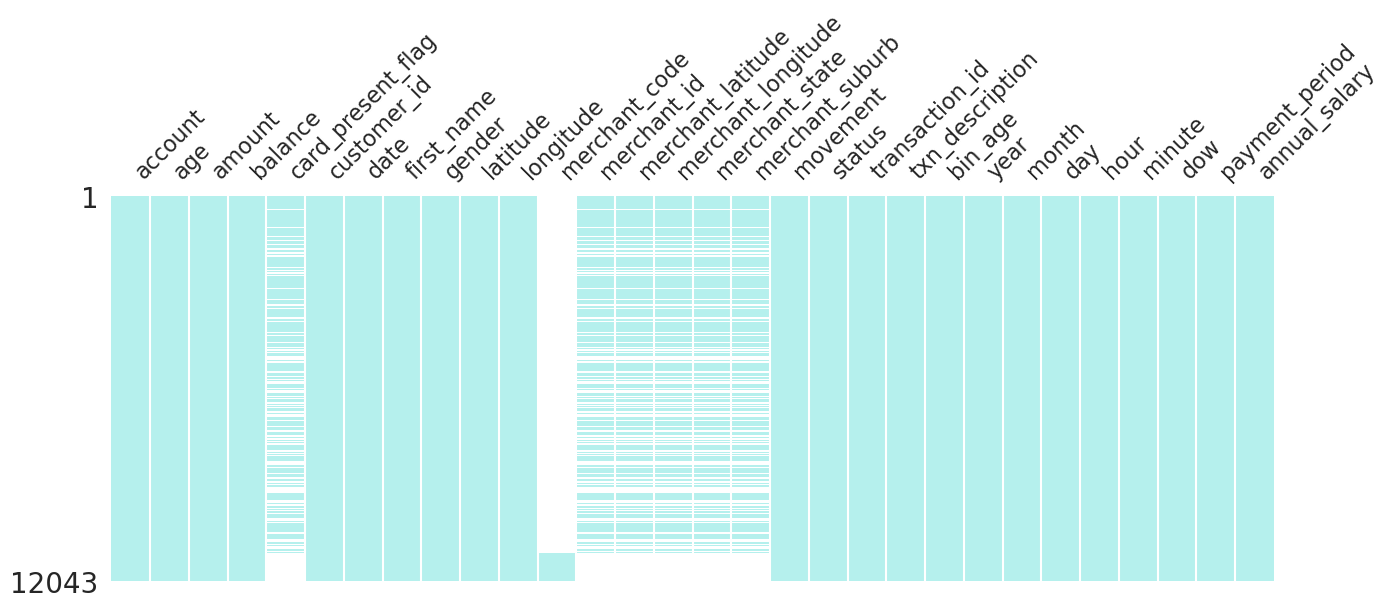

In [10]:
import missingno as msno
import matplotlib.pyplot as plt

fig = msno.matrix(df,sparkline=False,figsize=(15,5),
                      color=( 181/255, 240/255, 237/255 ));plt.show()

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>We can notice some patterns in features <b>card_present_flag</b>, <b>merchant_id</b>, <b>merchant_longitude</b>, <b>merchant_state</b> & <b>merchant_suburb</b></li>
    <li>The heamap confirms that rows of data missing in <b>card_present_flag</b> is the same as merchant features with the exception for <b>merchant_code</b></li>
</ul>
    
</div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>FEATURE INSPECTION</b>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>DROP UNINFORMATIVE COLUMNS</b>

**Dropping non informative features:**

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">

<ul>
    
<li>Let's start with features that don't differ <b>country</b> and <b>currency</b></li> 
<li><b>All transactions are made in Australia</b> and are in <b>AUD</b> (ie. only <b>domestic transactions</b> are included)
<li>Geographically transactions can in different <b>states</b> of Australia</li>
    
</ul>
</div>

In [11]:
# display(df['country'].value_counts())
# display(df['currency'].value_counts())
# df = df.drop(['country','currency'],axis=1)

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>VALUE COUNT INSPECTION</b>

No feature information is provided, this space is used for jottng some exploration, thoughts etc, 

Let's check the **unique values** in each column & try to understand our data

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_code</mark>** merchant code identification
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_id</mark>** merchant identifier (**<span style='color:#15C3BA'>106e1272-44ab-4dcb-a438-dd98e0071e51</span>** is most common)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_latitude</mark>** latitude of the merchant (most common **<span style='color:#15C3BA'>-37.82</span>**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_longitude</mark>** longitude of the merchant (most common **<span style='color:#15C3BA'>151.21</span>**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_state</mark>** state in which it is located (**<span style='color:#15C3BA'>NSW</span>** is most common)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">merchant_suburb</mark>** the specific suburb in which it is located (**<span style='color:#15C3BA'>Melbourne</span>** is most common)

***

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">amount</mark>** transation amount, **<span style='color:#15C3BA'>most are quite small (33,39,29,36 & 45) AUD</span>** were most common
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">movement</mark>** type of transaction, **<span style='color:#15C3BA'>credit</span>** or **<span style='color:#15C3BA'>debit</span>** (debit are related to spending, credit related to salary payments)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">status</mark>** transaction status, perhaps some transactions haven't been approved (**posted**)
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">transaction_id</mark>** unique identifier for each **transaction** made 
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">txn_description</mark>** category of **payments**
      
***
    
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">card_present_flag</mark>** likely indicates whether the payment went through **virtually** or **physically**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">date</mark>** data on which the transaction was made, busiest was **<span style='color:#15C3BA'>9/28/2018</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">extraction</mark>** another date, perhaps **the exact time** is included (but needs to be extracted), as opposed to just the date
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">bpay_biller_code</mark>**; **bpay** typically have a unique value:
  
***
  
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">long_lat</mark>**; perhaps the **location associated with the transaction** ( we also have **merchant_long** & **merchant_latitude**, perhaps there will be a connection there): if it is done in person, **both should coincide**? & if online, the **merchant will be a bank office** (something we should investigate)


***

- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">account</mark>** account number, the dataset contains a total of **<span style='color:#15C3BA'>100 unique bank accounts</span>** & their **transactions**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">customer_id</mark>**  **100 unique customer** identifiers
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">first_name</mark>** The most common first name associated with the transactions was **<span style='color:#15C3BA'>Michael</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">age</mark>** most transactions were made by **<span style='color:#15C3BA'>26 years olds</span>**
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">balance</mark>** perhaps the balance **before the transaction** took place, or perhaps after, the former makes slightly more sence
- **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">gender</mark>** most transactions made by **<span style='color:#15C3BA'>males</span>**

In [12]:
# # Merchant Related Columns
# merchs = [s for s in list(df.columns) if 'merchant' in s]

# for i in merchs:
#     print(f'Features: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')

# # Transaction related features
# trans = ['amount','movement','status','transaction_id','txn_description',
#          'card_present_flag','date']

# for i in trans:
#     print(f'feature: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')

# # Account User Related Features
# cus = ['account','customer_id','first_name','age','balance','gender']

# for i in cus:
#     print(f'feature: {i}')
#     display(df[i].value_counts())
#     print('\n','-'*79,'\n')

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PREPARE DATA FOR DOWNSTREAM TASKS</b>

- Let's prepare data for the exploratory data analysis, where we will explore debit payments `df_deb`
- For annual salary deduction, we will be utilising `txn_description`, storing the subset in `salary`

In [13]:
# Debit Transactions
df_deb = df[df.movement=='debit']

# Credit Transactions (salary payments)
df_credit = df[df.movement == 'credit']

# Load the salary data
txn = dict(tuple(df.groupby('txn_description')))
txn.keys()

dict_keys(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])

In [14]:
salary = txn['PAY/SALARY']

<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>3 ❯</span></b> <b>ANZ CUSTOMERS</b></div>

Let's try to find out some basic information about our customers!

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>AGE</b>


Let's look at the `age` distribution of all the 100 customers 

In [15]:
def plot_hist(ldf,feature,title,orient='v',height=350):

    if(orient is 'h'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                            marginal="box",
                           title=title,orientation='h',height=height)
    elif(orient is 'v'):
        fig = px.histogram(ldf[feature],nbins=100,template='plotly_white',
                           marginal="box",
                           title=title,orientation='v',height=height)
    
    fig.update_traces(marker_color='#15C3BA',marker_line_color="white")
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)
    fig.show('png',dpi=300)

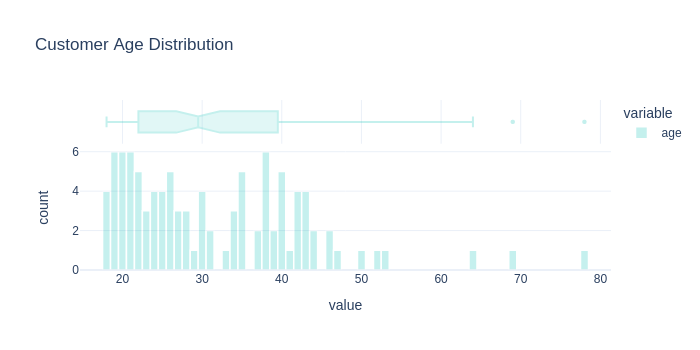

In [16]:
ldf = df.groupby(['customer_id']).agg('mean')['age']
ldf = ldf.to_frame()

plot_hist(ldf,'age','Customer Age Distribution')

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>FIRST NAME</b>

Let's look at the names of our ANZ customers, top 10 most popular and all unique names

In [17]:
# Groupby & first unique & v_counts
# Find the unique subset value counts

def plot_vcounts_groupby(ldf,gr_feature,feature,top=10,return_id=True,
                         orient='x',title=None,height=500):
    
    value_counts_s = ldf.groupby([gr_feature]).first()[feature].value_counts()
    value_counts_f = value_counts_s.to_frame()   
    
    if(top):
        value_counts = value_counts_f[:top]
    else:
        value_counts = value_counts_f
    
    if(orient is 'h'):
        fig = px.bar(value_counts,orientation='h',
                     height=height,template='plotly_white')
    elif(orient is 'v'):
        fig = px.bar(value_counts,orientation='v',
                     height=height,template='plotly_white')
        
    fig.update_traces(marker_color='#15C3BA', 
                      marker_line_color='white',
                      marker_line_width=1.5, opacity=1.0)
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)

    fig.show('svg',dpi=300,width=800)
    
    if(return_id):
        return value_counts_f

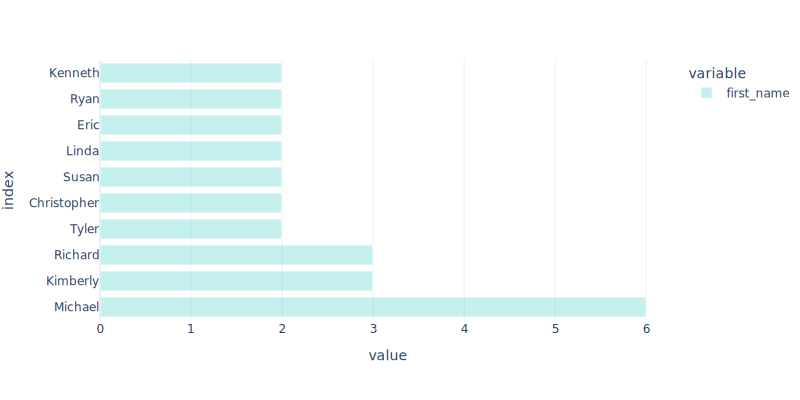

In [18]:
vc = plot_vcounts_groupby(df,'customer_id','first_name',orient='h',top=10,title='title',height=400)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>GENDER</b>

Let's view the distribution of male to females

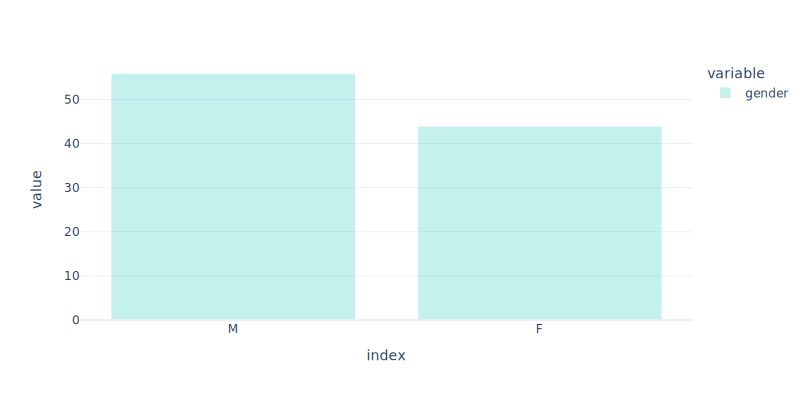

In [19]:
plot_vcounts_groupby(df,'customer_id','gender',
                     orient='v',title='title',height=400,return_id=False)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>We can see that a large portion of customer demographic is in the age group <b>(19-21) years old</b></li>
    <li>Only a handful of customers are of age <b>50+</b> years old (three outliers <b>64, 69 & 78</b>) years old</li>
    <li>Michael, Kimberley and Richard are the most commond first names of Customers</li>
    <li>We have a little more male customers than females (56 to 44)</li>
    
</ul>
</div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER ID RELATION TO ACCOUNT ID</b>

We have both account ID & customer ID, a customer can have multiple accounts in theory, lets take a look

In [20]:
find_id = 0
for i in dict(tuple(df.groupby(['customer_id']))):
    n = dict(tuple(df.groupby(['customer_id'])))[i]['account'].value_counts().shape[0]
    if(n > 1):
        find_id = 1
        
if(find_id == 1):
    print('customer_id with multiple accounts found')
else:
    print('all customer_id have unique account')

all customer_id have unique account


<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>All customers have one unique account ID</li>
</ul>
</div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER AND MERCHANT LOCATION</b>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>UNIQUE MERCHANT STATE ALLOCATIONS</b>

Most of our customers have made purchases using `merchants` located in at least one `state`
- this simply means that purchases have been assigned `merchants` located in multiple states

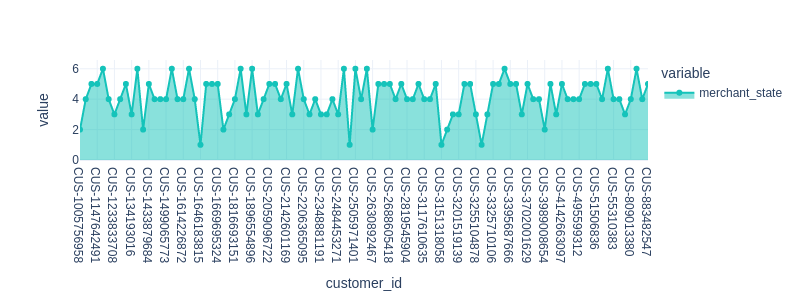

In [21]:
purchase_states = df.groupby(by=['customer_id','merchant_state']).agg('sum')[['amount']].reset_index().groupby('customer_id').agg('count')['merchant_state']
fig = px.area(purchase_states,
              markers=True,
              template='plotly_white',
              color_discrete_sequence=['#15C3BA'])
fig.show('png',dpi=300,width=800,height=300)

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>PURCHASE LOCATION</b>

- Despite being allocated merchants in different locations, all customers have made purchases in the same state
- Lets check how many transactions have the same purchase and merchant location 

In [22]:
ldf = df_deb[['customer_id','longitude','latitude','merchant_longitude','merchant_latitude']]
ldf['purchase'] = (ldf['longitude']**2 + ldf['latitude']**2)**0.5
ldf['merchant'] = (ldf['merchant_longitude']**2 + ldf['merchant_latitude']**2)**0.5
ldf['same'] = ldf['purchase'] == ldf['merchant']
print(ldf['same'].value_counts())

customer_purchases = dict(tuple(ldf.groupby(by='customer_id')))

False    11152
True         8
Name: same, dtype: int64


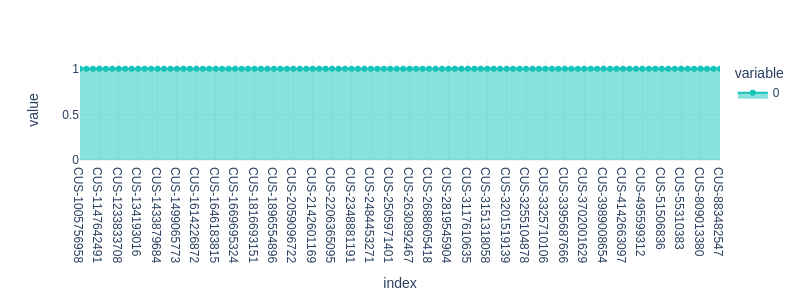

In [23]:
lst = {}
for i,j in customer_purchases.items():
    lst[i] = len(j['purchase'].value_counts())
    
fig = px.area(pd.Series(lst),
        markers=True,
        template='plotly_white',
        color_discrete_sequence=['#15C3BA'])

fig.show('png',dpi=300,width=800,height=300)


<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Customer puchase locations are not related to merchant locations</li>
    <li>Customers make purchases from the same location
</ul>
</div>

<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>4 ❯</span></b> <b>CUSTOMER TRANSACTIONS</b></div>

Let's try to find some insights about customer transactions & features that are associated 

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>TRANSACTION MOVEMENT</b>

- `movement` can be divided into two groups, **<span style='color:#15C3BA'>credit</span>** & **<span style='color:#15C3BA'>debit</span>** transactions
- **<span style='color:#15C3BA'>Credit</span>** transactions are associated with **<span style='color:#15C3BA'>salary payments</span>** as we could notice earlier from <code>value_counts</code> data
- We will explore **debit** & **credit** transaction data in separate sections


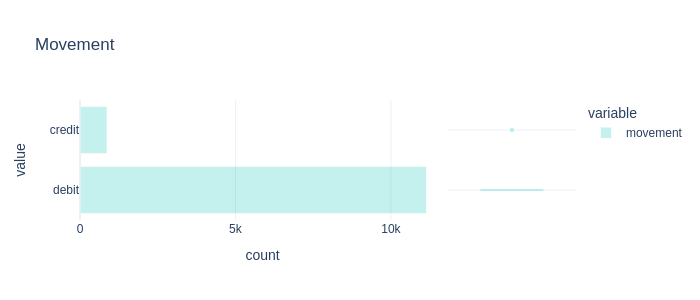

In [24]:
plot_hist(df,'movement',title='Movement',orient='h',height=300)



### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>TRANSACTION STATUS</b>

- Transaction `status` can be divided into two groups **<span style='color:#15C3BA'>authorised</span>** & **<span style='color:#15C3BA'>posted</span>**
- **Authorised** by virtue of its name is quite straightforward; a **merchant has also been allocated for the transaction**

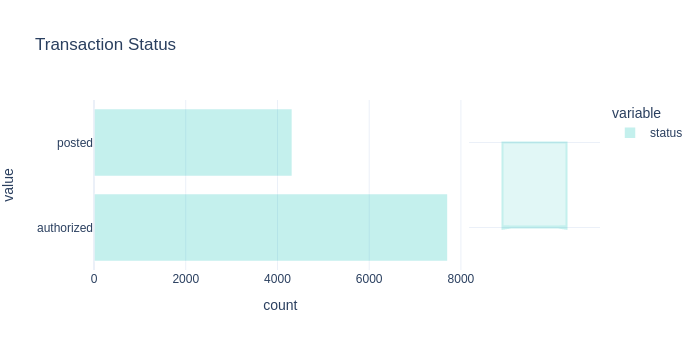

In [25]:
plot_hist(df,'status','Transaction Status',orient='h')

In [26]:
print(f"Number of merchant_id values missing in authorised transactions: {dict(tuple(df.groupby('status')))['authorized']['merchant_id'].isna().sum()}")

Number of merchant_id values missing in authorised transactions: 0


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>TRANSACTION DESCRIPTION</b>

- Rows with **posted** payments are of type, **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">PAYMENT</mark>**, **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">PAY/SALARY</mark>**, **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">INTER BANK</mark>**, **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">PHONE BANK</mark>**
- We can also clearly see that for these payments a **merchant** has not been allocated
- Perhaps these payments are **longer to process** compared to typical **EFTPOS** terminals

In [27]:
def plot_vcounts(ldf,feature,title,height=300):
    
    value_counts = ldf[feature].value_counts()
    value_counts = value_counts.to_frame()
    
    fig = px.bar(value_counts,height=height,
                 template='plotly_white')
    fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)
    fig.show('svg',dpi=300)

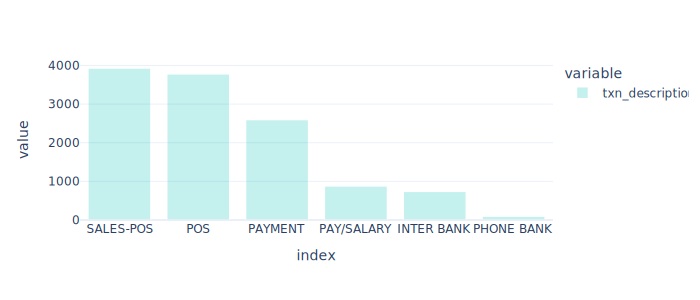

In [28]:
plot_vcounts(df,'txn_description','Transaction Status',height=300)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PRESENCE OF CARD DURING PAYMENT</b>

We have a feature called <code>card_present_flag</code>, whilst we did see some patterns earlier relating to this feature

There doesn't tend to be any visible variation between (0,1) values, however does exist for NaN:
- `txn_description` for both is the same **(POS-PAY,PAY)**, status for both is **authorised**
- `txn_description` for subset that contains **no card present flag** (NaN) is of type **(PAYMENT,SALARY,INTERNET,PHONE)**
- `merchant_code` is missing for both & other merchant features are available for both (0,1)

<br>

Some hyptheses about relation of 0/1 labels:

1. Typically **EFTPOS readers** have a passcode protection for purchases below a certain threshold, below which you don't need to enter your passcode (touch & go)
- However as the histogram below shows, this doesn't tend to be the difference either, as we have `amount` > **4000 AUD** for both flags

2. Another possible variant is more logical, it is associated with the introduction of **<span style='color:#15C3BA'>phone based payment systems</span>** - **[ANZ digital wallets](https://www.anz.com.au/ways-to-bank/digital-wallets/)** (Eg. Apple Pay or QR code based payments etc)
- Such technology is probably more common amongst **younger demographic** & since we have age groups
- Upon finding the mean for each <code>card_present_flag</code> subgroup, it was noted that the mean **age is actually almost the same**

So the question still remains, we'll have to look at the **correlation** between features later on, perhaps there may be something we have missed

In [29]:
ldf = df.card_present_flag.value_counts(dropna=False).to_frame()
ldf.style.bar(align='mid',color=['#15C3BA','#15C3BA'])

,card_present_flag
1.000000,6194
nan,4326
0.000000,1523


In [30]:
print('No Card Present Flag Information Available')
ldf = df.copy()
ldf['card_present_flag'] = df['card_present_flag'].fillna(-1)
display(dict(tuple(ldf.groupby(['card_present_flag'])))[-1]['txn_description'].value_counts())
print('')
print('Card Present Flag Activated')
ldf = df.copy()
display(dict(tuple(ldf.groupby(['card_present_flag'])))[1]['txn_description'].value_counts())
print('')
print('Card Present Flag Non Activated')
ldf = df.copy()
display(dict(tuple(ldf.groupby(['card_present_flag'])))[1]['txn_description'].value_counts())

No Card Present Flag Information Available


PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


Card Present Flag Activated


SALES-POS    3169
POS          3025
Name: txn_description, dtype: int64


Card Present Flag Non Activated


SALES-POS    3169
POS          3025
Name: txn_description, dtype: int64

In [31]:
mdf = dict(tuple(df.groupby('card_present_flag')))
print(mdf.keys())

dict_keys([0.0, 1.0])


In [32]:
pd.set_option('display.max_columns', None)

display(mdf[0.0].head())
mdf[0.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,13270a2a902145da9db4c951e04b51b9,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.65
5,ACC-1598451071,26,11.28,995.57,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,73aac058-cb31-46c2-826d-29b161bfb23e,-28.13,153.47,QLD,Elanora,debit,authorized,9a13829c885344c3ad6c6f1a2d30d1bc,SALES-POS,20-30,2018,8,1,19,33,Wednesday,7 days,52855.65
6,ACC-1598451071,26,8.99,986.58,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,d87e2b48-3fc5-47e4-87c5-014e56e493df,-28.13,153.47,QLD,Elanora,debit,authorized,e1949cb88eb74ad1b0391347a221e938,POS,20-30,2018,8,1,21,38,Wednesday,7 days,52855.65
17,ACC-1598451071,26,2.08,702.78,0.0,CUS-2487424745,2018-08-03,Diana,F,-27.95,153.41,NaN,1f91ac18-372f-40b5-bbf8-5a3580e8fa1b,-27.68,153.24,QLD,Carbrook,debit,authorized,95dfc6684cf144ecb038265af7f1c04c,SALES-POS,20-30,2018,8,3,11,4,Friday,7 days,52855.65
24,ACC-1598451071,26,30.44,557.43,0.0,CUS-2487424745,2018-08-04,Diana,F,-27.95,153.41,NaN,75b65ffc-1abf-4fae-9ab9-44a41247bb5a,-27.89,153.31,QLD,Oxenford,debit,authorized,2e019304a1bd47dc992d21255b24e165,SALES-POS,20-30,2018,8,4,9,33,Saturday,7 days,52855.65


SALES-POS    765
POS          758
Name: txn_description, dtype: int64

In [33]:
display(mdf[1.0].head())
mdf[1.0]['txn_description'].value_counts()

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,a623070bfead4541a6b0fff8a09e706c,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.65
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,329adf79878c4cf0aeb4188b4691c266,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.65
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,f2ef6270-cf91-409f-a6a2-fbd6735ea500,-28.63,153.60,NSW,Byron Bay,debit,authorized,1c12c9ad77894ef8b507fb091e41e928,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.65
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,-28.01,153.41,QLD,Bundall,debit,authorized,cd0113426970425a8524e55f4079408f,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.65
7,ACC-1598451071,26,10.32,976.26,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,NaN,4345dbd1-dfa8-4466-892a-4136a5ae08a2,-27.94,153.41,QLD,Labrador,debit,authorized,e9ff93190c9a4a088994e0f74b02e953,POS,20-30,2018,8,1,22,25,Wednesday,7 days,52855.65


SALES-POS    3169
POS          3025
Name: txn_description, dtype: int64

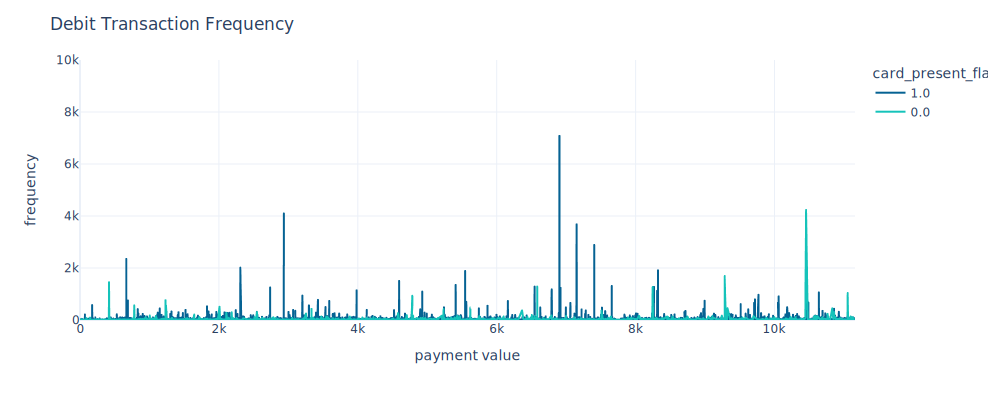

In [34]:
fig = px.line(df_deb,y='amount',color='card_present_flag',
                   height=400,
                   color_discrete_sequence=['#056293','#15C3BA'],)

fig.update_yaxes(range=[0,10000])
fig.update_layout(template='plotly_white',title='Debit Transaction Frequency')
fig.update_xaxes(title_text='payment value')
fig.update_yaxes(title_text='frequency')
fig.show('svg',dpi=300,width=1000)

Let's find the mean age for transactions with different subgroups of `card_present_flag`

In [35]:
print('mean age group between 0/1')
mdf = df.groupby(['card_present_flag']).agg('mean')['age'].to_frame()

mdf.style.bar(align='mid',color=['#056293','#15C3BA'])

mean age group between 0/1


,age
card_present_flag,
0.000000,30.212081
1.000000,30.012754


<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>5 ❯</span></b> <b>CREDIT TRANSACTIONS</b></div>

The credit subset contains data about **<span style='color:#15C3BA'>salary payments</span>**, so it's of interest to us for the task that we will do in **<span style='color:#15C3BA'>Section 8</span>**

<br>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>QUARTERLY PAYMENTS</b>

Lets check average **3 month statistics** for **<span style='color:#15C3BA'>salary payments</span>** of each of the **100 customers**

- We have an average monthly salary of **5588 AUD**
- The smallest average monthly salary was **2385 AUD**
- The highest average monthly salary was **117981 AUD**

In [36]:
income_by_cus = df[df['movement'] == 'credit'] \
                  .groupby('customer_id')['amount'] \
                  .sum()/3

income_by_cus.describe()

count      100.000000
mean      5588.589500
std       2247.181239
min       2385.320000
25%       3863.777500
50%       4937.828333
75%       7110.838333
max      11781.306667
Name: amount, dtype: float64

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER SEGMENTATION BY QUARTERLY INCOME</b>

- We can note that **61/100 customers** earn less than the **<span style='color:#15C3BA'>average income</span>** salary amount of **5588 AUD**
- Let's create **three different groups of customers**: **<span style='color:#15C3BA'>Low earning customers</span>**,**<span style='color:#15C3BA'>Middle earning customers</span>** & **<span style='color:#15C3BA'>High earning customers</span>**
- Also let's plot the **payment** `amount` for **high income** & **low income** customers

In [37]:
print(len(income_by_cus.to_frame()[income_by_cus.to_frame()['amount']<5588]), 'customers earn below the mean value')

61 customers earn below the mean value


In [38]:
# top 30 and last 30 by monthly income average of customers
ldf = income_by_cus.sort_values(ascending=False)
ldf_max = ldf.to_frame()[:30]
ldf_min = ldf.to_frame()[-30:]
ldf_mid = ldf.to_frame()[30:70]

highest_earners = list(ldf_max.index)
middle_earners = list(ldf_mid.index)
low_earners = list(ldf_min.index)

def plist(lst,name):

    cols = 4
    # Figure out how many rows are needed
    rows, extra = divmod(len(lst), cols)
    if extra > 0:
        # That means we need one final partial row
        rows += 1

    print(name)
        
    # And show each row in turn
    for row in range(rows):
        line = ""
        for col in range(cols):
            i = col * rows + row
            if i < len(lst):
                line += f"{i:3d} {lst[i]:^14}  "
        print(line)
        
    print('\n')
    
plist(highest_earners,'Highest Earners')
plist(middle_earners,'Middle Earners')
plist(low_earners,'Low Earners')

Highest Earners
  0 CUS-1816693151    8 CUS-883482547    16 CUS-3249305314   24 CUS-1790886359  
  1 CUS-3142625864    9 CUS-1462656821   17 CUS-2663907001   25  CUS-55310383   
  2 CUS-2738291516   10 CUS-1196156254   18 CUS-1617121891   26 CUS-2059096722  
  3 CUS-2155701614   11 CUS-134833760    19 CUS-2500783281   27 CUS-3026014945  
  4 CUS-261674136    12 CUS-2376382098   20 CUS-2819545904   28 CUS-164374203   
  5 CUS-2031327464   13 CUS-2505971401   21 CUS-1147642491   29 CUS-3462882033  
  6 CUS-527400765    14 CUS-1117979751   22 CUS-3174332735  
  7 CUS-3336454548   15 CUS-4142663097   23 CUS-1478398256  


Middle Earners
  0 CUS-495599312    10 CUS-3117610635   20 CUS-127297539    30 CUS-2283904812  
  1 CUS-2317998716   11 CUS-1271030853   21 CUS-1388323263   31 CUS-2370108457  
  2 CUS-3180318393   12 CUS-325142416    22 CUS-3325710106   32 CUS-2142601169  
  3 CUS-537508723    13 CUS-3989008654   23 CUS-2487424745   33 CUS-3129499595  
  4 CUS-4023861240   14 CUS-1220154

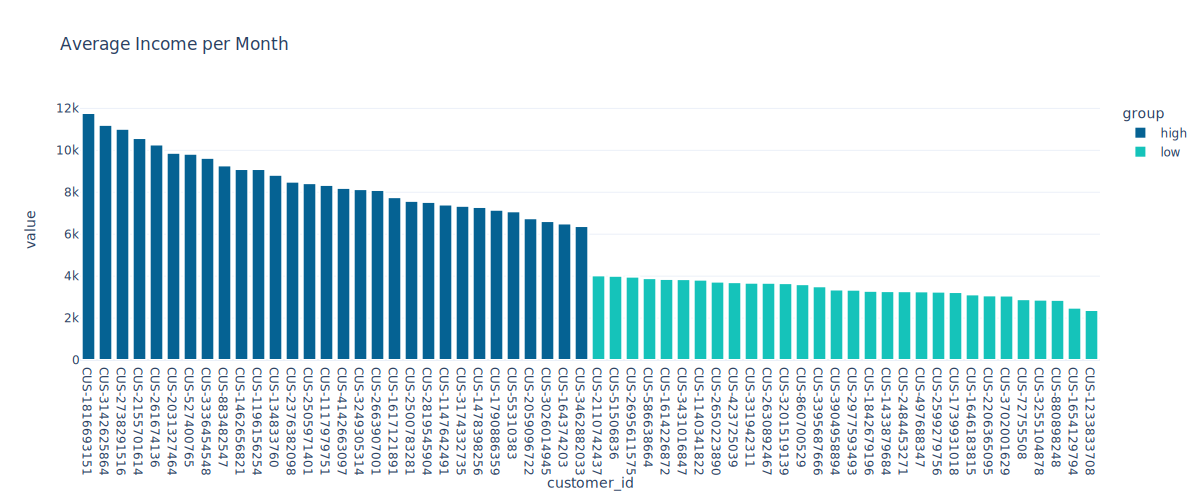

In [39]:
high = ldf_max[['amount']].round(0)
low = ldf_min[['amount']].round(0)
high['group'] = 'high'
low['group'] = 'low'
all_seg = pd.concat([high,low],axis=0)

fig = px.bar(data_frame=all_seg,color='group',
             template='plotly_white',
             color_discrete_sequence=['#056293','#15C3BA'],
             width=1200,orientation='v',
             title='Average Income per Month')

fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(textposition='outside', textfont_size=14)
fig.show('svg',dpi=300)

<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>6 ❯</span></b> <b>DEBIT TRANSACTIONS</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER PURCHASES DATASET</b>

In this section we will focus on transactions made by customers **<mark style="background-color:#15C3BA;color:white;border-radius:5px;opacity:1.0">debit transactions</mark>**:
- Let's now focus on **<span style='color:#15C3BA'>debit</span>** transactions (ie. those classified as payments) we have **11160 transactions**
- All procurement associated transaction (in shop,online,by phone...) by are of type **debit** in this dataset
- Extract a subset for all debit related purchases by customers using `movement` = **debit**


- We focus on **age wise transaction** variations:
    - How much is spent, variation by month, variation by day of the week 
    - Variation by hour of the day 


- Total Debit transaction data distribution
- We'll also focus on **gender wise transaction** variation

| | | | |
|-|-|-|-|
|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">PAYMENT SUM BY AGE              </div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">PAYMENT SUM BY AGE AND MONTH</div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">PAYMENT SUM BY AGE AND DAY OF THE WEEK</div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">PAYMENT SUM BY AGE AND HOUR</div>|
| <div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">ACCUMULATIVE SPENDING BY AGE GROUP</div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">PAYMENT DISTRIBUTION</div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">TRANSACTION FREQENCY & VOLUME BY GENDER & HOUR</div>|<div style=" background-color:#2da19b; padding: 30px 30px; border-radius: 8px; color: white">TRANSACTION FREQUENCY & VOLUME BY GENDER & DOW</div>|

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PAYMENT SUM BY AGE</b>

`Age` is definitely a factor, which influences **customer transactions**, let's find some interesting relations in the `df_deb` (debit subset)

- **<span style='color:#15C3BA'>Debit payment amounts by age group</span>** tells us which age group spends the most during this period
- **<span style='color:#15C3BA'>Monthly debit transaction amount per age group</span>** tells us how much each age group spent each month

<br>

Let's stack all of the `amount` data for each `bin_age` group, to determine their **total spending amount** for each age category

- We can note that **20-30** year old tended to spend the most over the three months, followed by **30-40** year olds
- Older age groups, especially **70>** year olds didn't tend to spend much

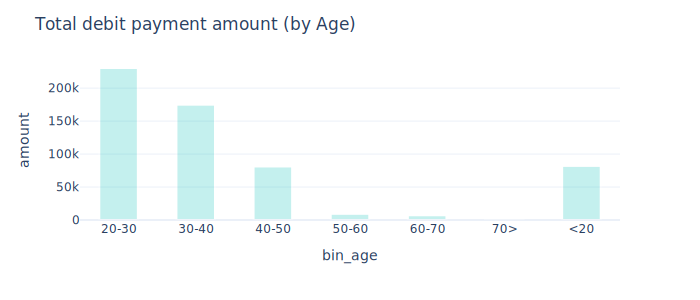

In [40]:
df_deb2 = df_deb.groupby(['bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',
             template='plotly_white',height=300)
fig.update_traces(marker_color='#15C3BA',opacity=1.0,width=0.5)
# fig.update_yaxes(range=[0, 50000])
fig.update_layout(xaxis={'dtick':1},
                  title='Total debit payment amount (by Age)')

fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.update_yaxes(matches=None)
fig.show('svg',dpi=300)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PAYMENT SUM BY AGE & MONTH</b>


If we break down the `amount` for each of the **three months** (aug,sept,oct) for each age group
- We can see that the trend doesn't change much over this period
- Except for **30-40** age group in **september**, which was higher than usual

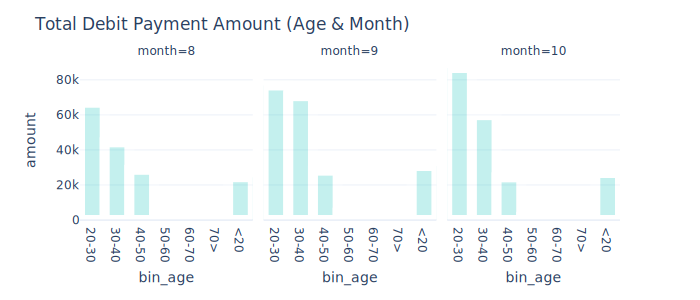

In [41]:
df_deb2 = df_deb.groupby(['month','bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.bar(df_deb2,x='bin_age',y='amount',template='plotly_white',
             facet_col='month',facet_col_wrap=3)

fig.update_traces(marker_color='#15C3BA',opacity=1.0,width=1)
fig.update_layout(title='Total Debit Payment Amount (Age & Month)',height=300)
fig.update_traces(marker_line_width = 10,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25,width=1)

fig.show('svg',dpi=300)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PAYMENT BY AGE & DOW</b>


If we break down the `amount` by **day of the week** for each age group:

- **<20** spend more on **wednesdays** (14.72k) & least on **mondays** (8.9k)
- **20-30** spend more on **wednesdays** (37.71k) & least on **mondays** (26.66k)
- **30-40** spend more on **saturdays** (32.69k) & least on **mondays** (18.89k)
- **40-50** spend more on **saturdays** (16.2k) & least on **mondays** (7.8k)
- **50-60** spend more on **wednesdays** (2.68k) & least on **mondays** (0.64k)
- **60-70** spend more on **thursdays** (1.36k) & least on **wednesdays** (0.3k)
- **70+** spend more on **fridays** (0.6k) & least on **tuesdays** (0k)

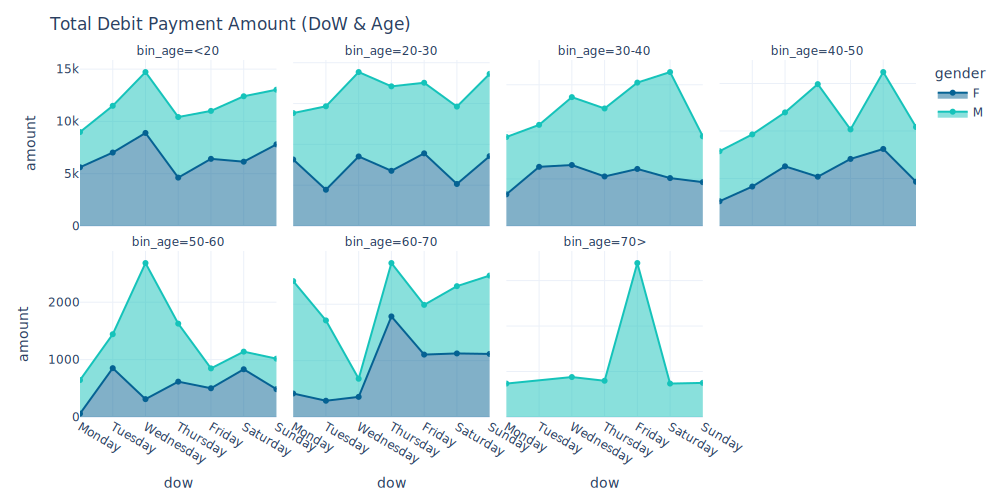

In [42]:
df_deb2 = df_deb.groupby(['dow','bin_age','gender']).sum()['amount']
df_deb2 = df_deb2.reset_index()

fig = px.area(df_deb2,x='dow',y='amount',
              color='gender',
              template='plotly_white',
              markers=True,
              color_discrete_sequence=['#056293','#15C3BA'],
             facet_col='bin_age',facet_col_wrap=4,height=500,
             category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday'],
                             'bin_age':['<20','20-30','30-40','40-50','50-60',
                                       '60-70','70>']})

fig.update_layout(title='Total Debit Payment Amount (DoW & Age)')
fig.update_yaxes(matches=None)
fig.show('svg',dpi=300,height=500,width=1000)


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PAYMENT SUM BY AGE & HOUR</b>

If we look at overall spending trends:

- If we break down <code>amount</code> by **hourly** basis for each age group using the plotly **animation** function, we can clealy see a spending trend with age
- For customers **<20** the spending amount is not so high compared to **20-30** year old, the tendency of spending then reduces for **30-40** & **40-50** year olds 
- If we had more data for **60-70**, it would likely show the same spending reduction trend

The **highest amount of spending** periods:

- **<20** spend more at **9 PM** (7.4k) & least at **0 AM** (386)
- **20-30** spend more at **2 PM** (18.2k) & least at **0 AM** (1.5k)
- **30-40** spend more at **9 AM** (18.05k) & least at **0 AM** (934)
- **40-50** spend more at **11 AM** (10.8k) & least at **3 AM** (67)
- **50-60** spend more at **10 AM** (2.2k) & least at **0 AM** (0)
- **60-70** spend more at **8 PM** (1k) & least at **0 AM** (0)
- **70+** spend more at **9 PM** (494) & least at **0 AM** (0)

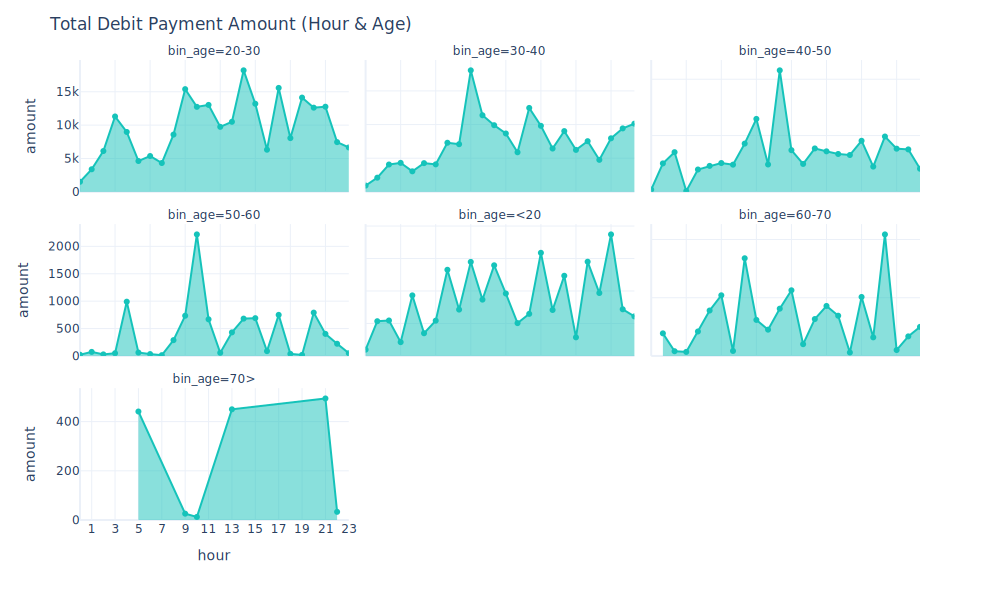

In [43]:
df_deb2 = df_deb.groupby(['hour','bin_age']).sum()['amount']
df_deb2 = df_deb2.reset_index()
df_deb2

fig = px.area(df_deb2,x='hour',y='amount',
             template='plotly_white',
             facet_col='bin_age',
              markers=True,
             facet_col_wrap=3,
             color_discrete_sequence=['#15C3BA'])

fig.update_traces(marker_color='#15C3BA',opacity=1.0)
fig.update_layout(title='Total Debit Payment Amount (Hour & Age)')
fig.update_xaxes(tickvals = [i for i in range(0,24,3)])
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.update_yaxes(matches=None)

fig.update_traces(marker_line_width = 5,selector=dict(type="marker"))
fig.update_yaxes(matches=None)
fig.show('svg',dpi=500,height=600,width=1000)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>ACCUMULATIVE SPENDING FOR DIFFERENT DEMOGRAPHIC</b>

**Cumulative debit spending** data allows us to compare total spending of different age groups at different parts of the day

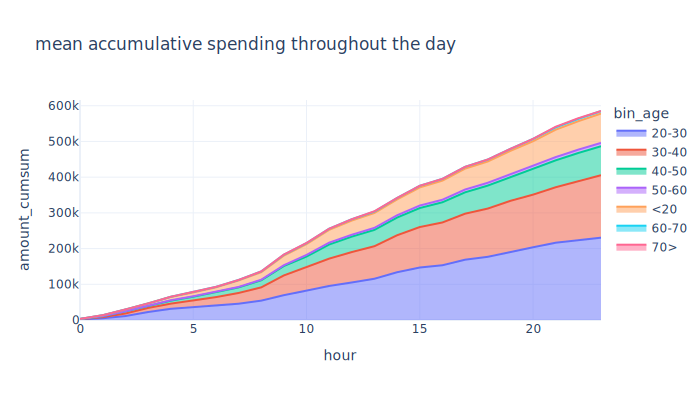

In [44]:
df_deb2_sum = df_deb.groupby(['hour','bin_age']).sum()['amount'] # total age group spending
df_deb2_sum = df_deb2_sum.reset_index()
df_deb2_sum = df_deb2_sum.join(df_deb2_sum.groupby('bin_age').cumsum(),rsuffix="_cumsum")

fig = px.area(df_deb2_sum,
              x='hour',
              y='amount_cumsum',
              color='bin_age',
              height=400,
        template='plotly_white',title='mean accumulative spending throughout the day')
fig.show('svg',dpi=300)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>20-30, 30-40 year old demographic have the highest accumulative speding</li>
</ul>
</div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PAYMENT DISTRIBUTION</b>

Plot the distribution of `amount` transaction values for all customers

- We have a very **<span style='color:#15C3BA'>one sided/skewed data distribution</span>**, outliers starting around **100 AUD**
- Customers tended to make **<span style='color:#15C3BA'>lots of small purchases</span>** as the distribution suggest **0-20 AUD**

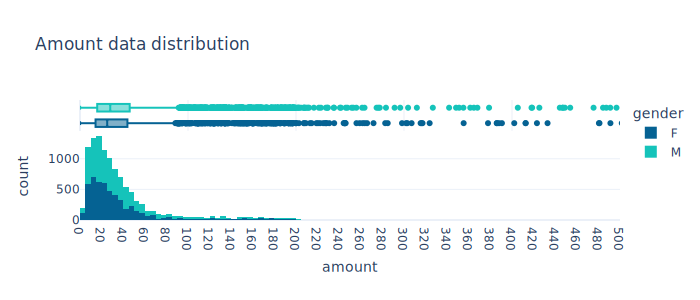

In [45]:
fig = px.histogram(df_deb,x='amount',
                   color='gender',
                   marginal='box',
                   template='plotly_white',
                   title='Amount data distribution',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   nbins=3000,height=300)

fig.update_layout(xaxis={'dtick':20})
fig.update_xaxes(range=[0, 500])
fig.show('svg',dpi=300)

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>TRANSACTION FREQENCY & VOLUME BY GENDER & HOUR</b>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRANSACTION COUNT BY GENDER & HOUR</b>

Let's visualise the **transaction count/frequency** for both male & females for each of the three months

In [46]:
df2_grp= (df_deb.groupby(by=['hour','month','gender'])
              .agg(['count','sum'])[['amount']]
              .reset_index())

df2_grp.columns = ['hour', 'month' ,'gender',
                   'Transaction Count', 
                   'Total Transaction Amount']

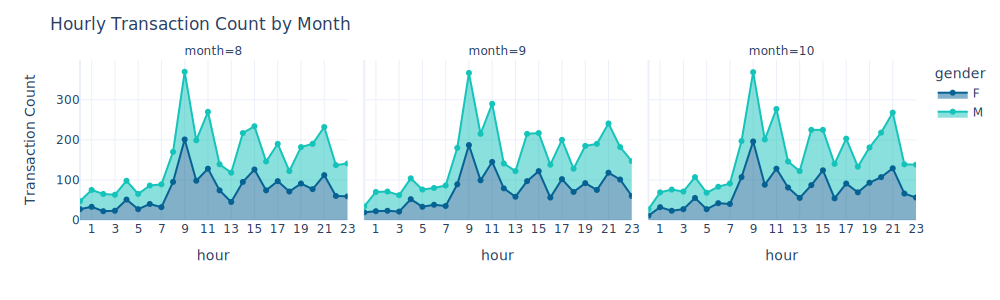

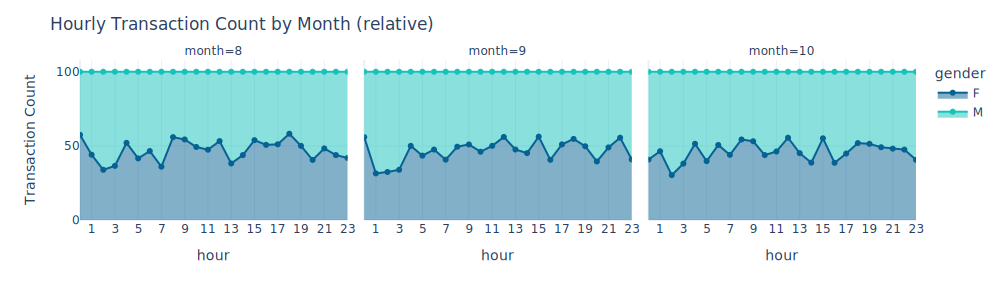

In [47]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            facet_col_wrap = 3,    
            markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            facet_col_wrap = 3,    
            markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Count by Month (relative)')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Males tend to be more active at night time (12am - 5am)</li>
    <li>Purchase trends (time of transactions) tend to be very similar from month to month</li>
</ul>
</div>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRANSACTION VOLUME BY GENDER & HOUR</b>

Let's visualise the **transaction volume** for both male & females for each of the three months

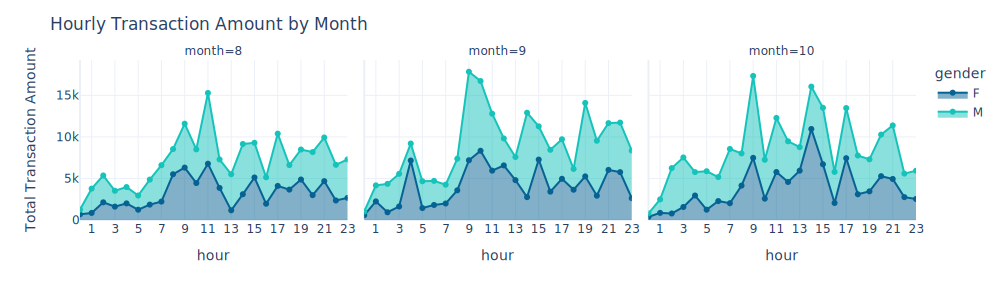

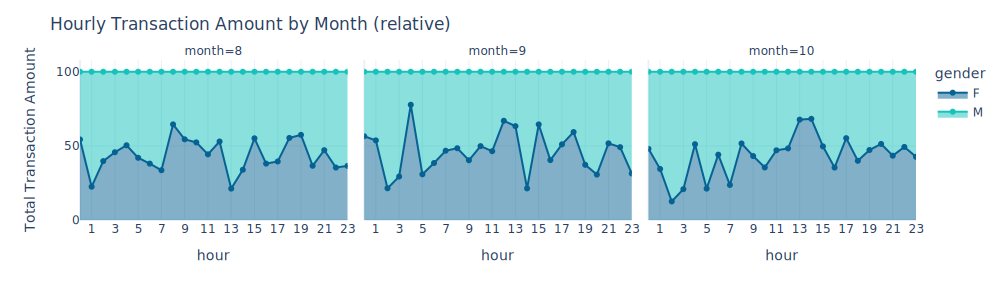

In [48]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            markers=True,
            facet_col_wrap = 3,            
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['month'],
            markers=True,
            groupnorm='percent',
            facet_col_wrap = 3,            
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'])

fig.update_layout(height=300,
                  title='Hourly Transaction Amount by Month (relative)')
fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Purchase sums (value of transactions) tend to be quite unstructured from month to month</li>
    <li>Purchases sums at night tended to be quite hight compared to peak purchase times at 9 and 11 am</li>
</ul>
</div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>TRANSACTION FREQUENCY & VOLUME BY GENDER & DOW</b>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRANSACTION COUNT BY GENDER & DOW</b>

Taking into account `gender` it may be of interest to notice some variation, let's first group the data & find the total number of transactions made by both genders and groupby by **day of the week**

In [49]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])
                      .agg(['count','sum'])[['amount']]
                      .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender']).count()['amount'].reset_index()

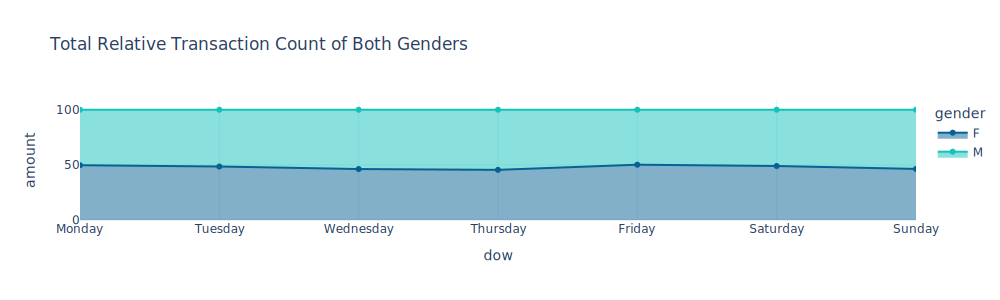

In [50]:
fig = px.area(tdf,x='dow',y='amount',color='gender',
                   markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']},height=300,
             title='Total Relative Transaction Count of Both Genders')
fig.show('svg',dpi=300,width=1000)

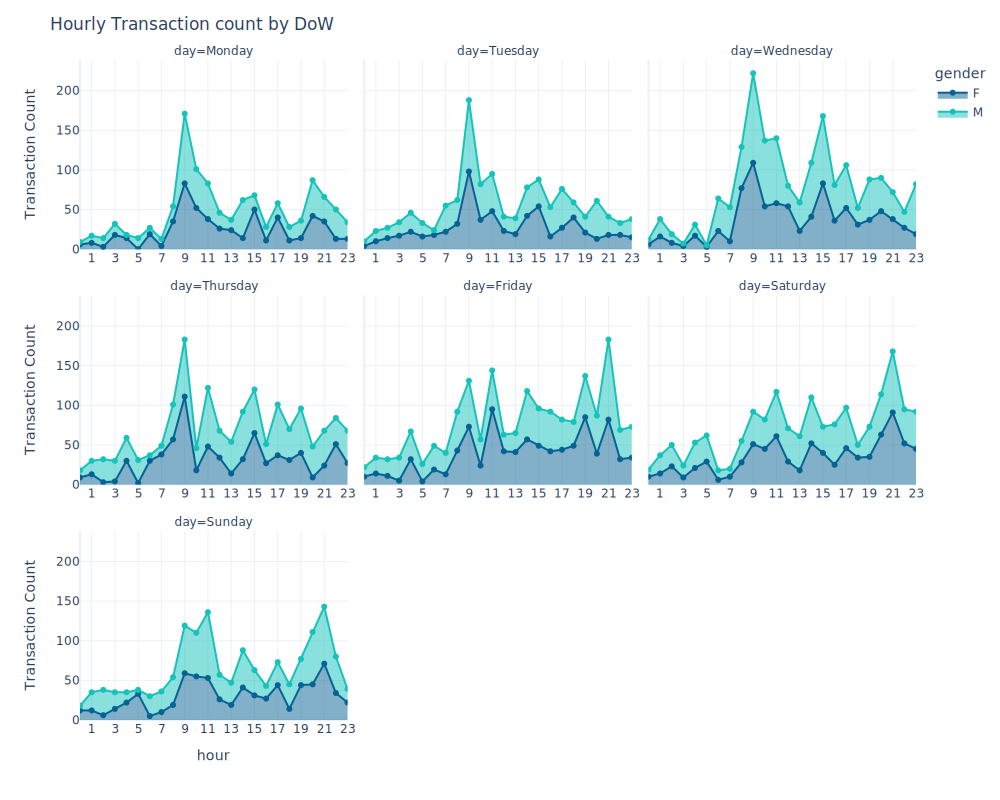

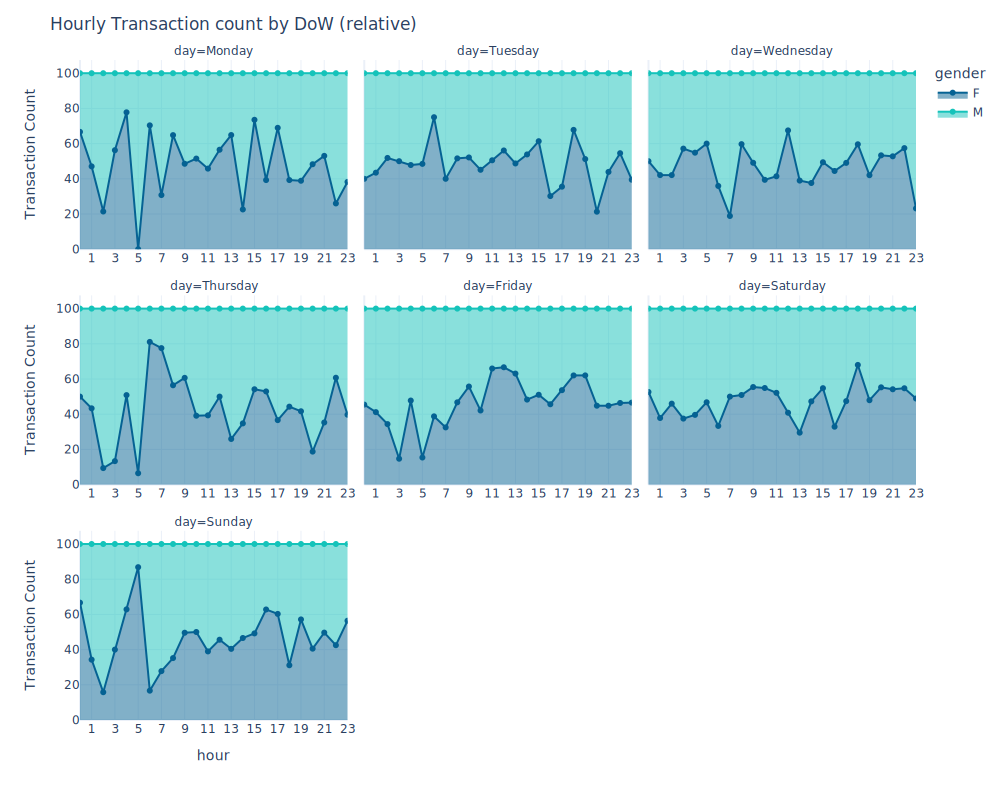

In [51]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,   
            markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction count by DoW')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Transaction Count'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,   
            markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction count by DoW (relative)')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Males tend to , especially on thursdays and saturdays</li>
    <li>Mondays through to wednesdays tend to have similar purchasing time behaviour</li>
    <li>Purchase trends (time of transactions) tend to be very similar from month to month</li>
</ul>
</div>

In [52]:
df2_grp= (df_deb.groupby(by=['hour','dow','gender'])
              .agg(['count','sum'])[['amount']]
              .reset_index())

df2_grp.columns = ['hour', 'day' ,'gender',
                   'Transaction Count', 'Total Transaction Amount']

tdf = df_deb.groupby(by=['dow','gender']).sum()['amount'].reset_index()

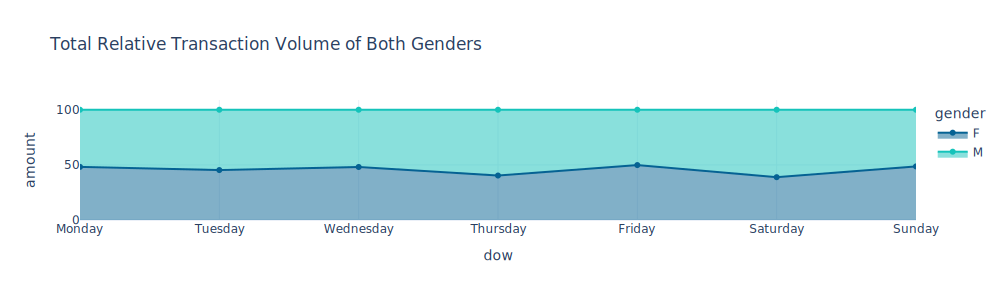

In [53]:
fig = px.area(tdf,x='dow',y='amount',color='gender',
                   markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'dow':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']},height=300,
              
             title='Total Relative Transaction Volume of Both Genders')
fig.show('svg',dpi=300,width=1000)

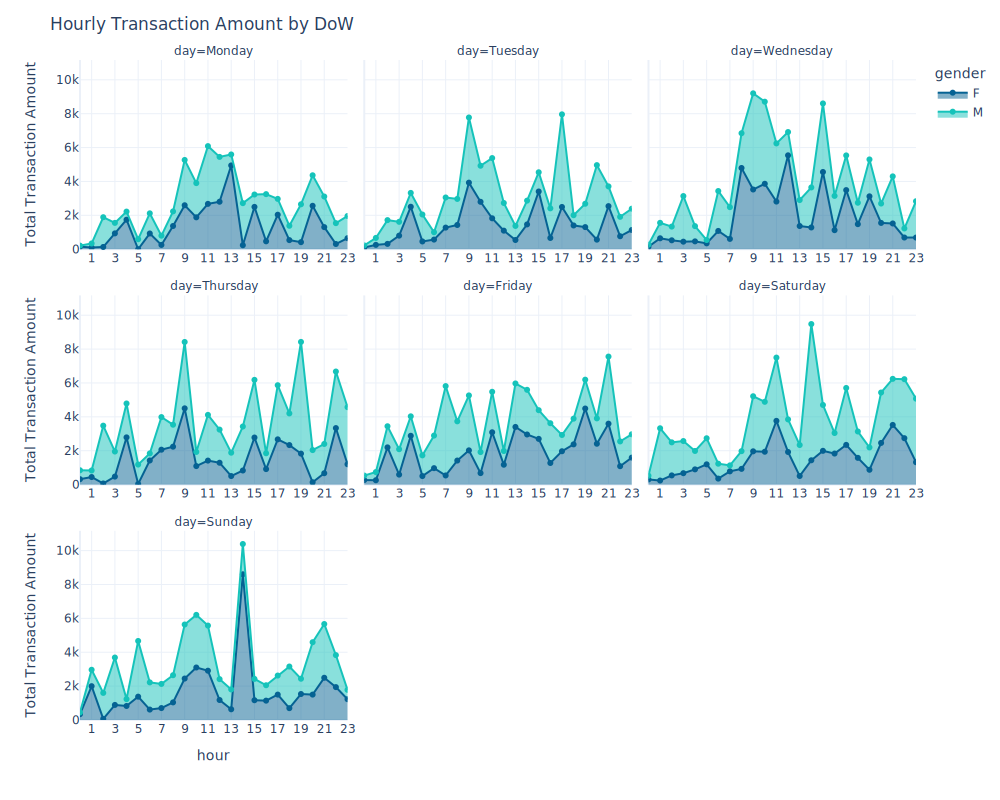

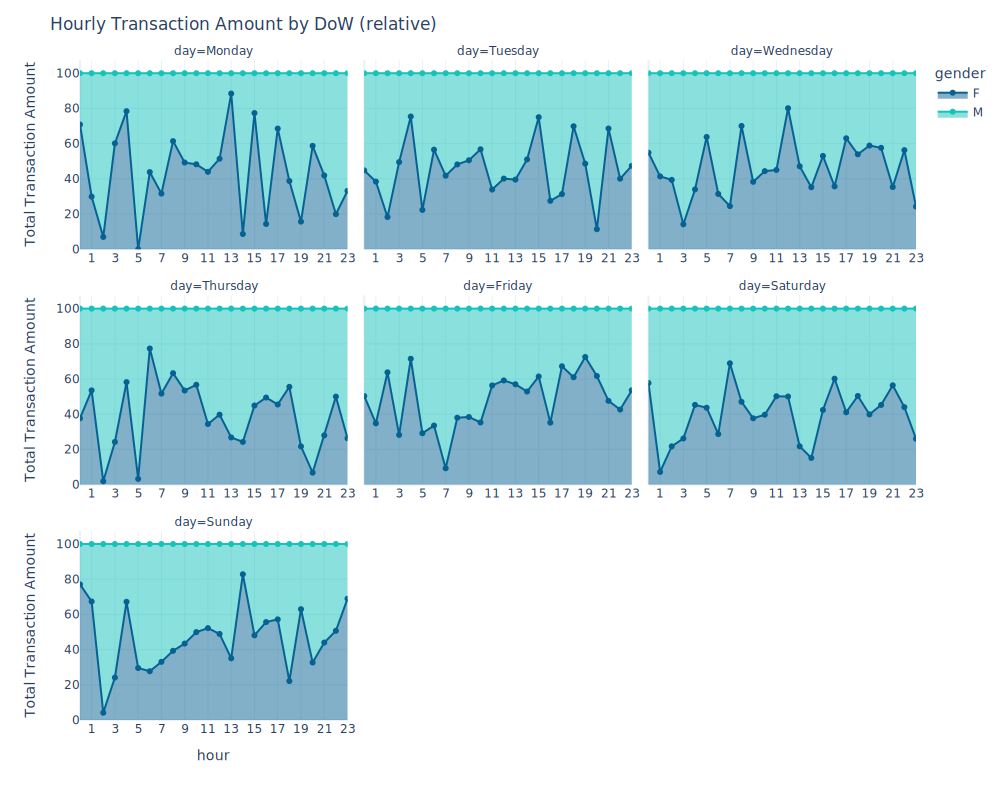

In [54]:
fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,    
             markers=True,
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Amount by DoW')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

fig = px.area(data_frame=df2_grp,
            x=df2_grp['hour'],
            y=df2_grp['Total Transaction Amount'],
            color=df2_grp['gender'],
            facet_col= df2_grp['day'],
            facet_col_wrap = 3 ,    
             markers=True,
            groupnorm='percent',
            template='plotly_white',
            color_discrete_sequence=['#056293','#15C3BA'],
            category_orders={'day':['Monday','Tuesday','Wednesday',
                                     'Thursday','Friday','Saturday',
                                     'Sunday']})

fig.update_layout(height=800,
                  title='Hourly Transaction Amount by DoW (relative)')

fig.update_layout(xaxis1_showticklabels=True,xaxis1_tickvals = np.arange(1, 24, 2),
                  xaxis2_showticklabels=True,xaxis2_tickvals = np.arange(1, 24, 2),
                  xaxis3_showticklabels=True,xaxis3_tickvals = np.arange(1, 24, 2),
                  xaxis4_showticklabels=True,xaxis4_tickvals = np.arange(1, 24, 2),
                  xaxis5_showticklabels=True,xaxis5_tickvals = np.arange(1, 24, 2),
                  xaxis6_showticklabels=True,xaxis6_tickvals = np.arange(1, 24, 2),
                  xaxis7_showticklabels=True,xaxis7_tickvals = np.arange(1, 24, 2),
                  xaxis8_showticklabels=True,xaxis8_tickvals = np.arange(1, 24, 2),
                  xaxis9_showticklabels=True,xaxis9_tickvals = np.arange(1, 24, 2))
fig.show('svg',dpi=300,width=1000)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>Males spend more than women every single day, especially on thursdays and saturdays</li>
    <li>Mondays through to wednesdays tend to have similar purchasing time behaviour</li>
    <li>Purchase trends (time of transactions) tend to be very similar from month to month</li>
</ul>
</div>



## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>7 ❯</span></b> <b>CUSTOMER ANNUAL SALARY</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>SALARY ESTIMATION</b>

There are a couple of ways we can estimate the annual income
- Get the total for 3 months & multiply by 4 (less accurate)
- Utilise a constant payment period (more accurate)

We should also probably confirm that:
- Paymenys to each customer don't change every payment period
- If the payments are not constant, we should find a way to deal with this scenerio

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>FINDING SALARY PAYMENT ABNORMALITIES</b>

- `salary` contains all the work realted **transactions** made to each customer, from their correponding employer, we'll use this subset to calcualte the annual salary for all 100 customers
- Looks like we are quite fortunate with this dataset, as all customers receive identical payment values over the 3 month period
- This simplifies our salary payment process, so we can use `grouby` with `nth(-1)`, when selecting `ammount`

In [55]:
acc_amm = dict(tuple(salary.groupby(['account','amount'])))
combinations = list(acc_amm.keys())
print(f'{len(combinations)} salary payment/account combinations')

100 salary payment/account combinations


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>SALARY PAYMENT PERIODS</b>

Finding Payment Value Abnormalities

- `date` or `extraction` contain time based data, which contains information about the periodicity of payments, from this data we will be able to extract the date when the payment was made
- We'll assume that both `date` & `extraction` is made on the same day, no confirmation is made

In [56]:
# Function that will show all transactions made for an account
# I've gone for a more manual approach to checking payment periods 
# as there are not too many customers with irregular payments

def show_account_transactions(account_id):
    return dict(tuple(salary.groupby('account')))[account_id]

# Example, show transactions for account ACC-414431115
show_account_transactions('ACC-414431115')

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
11361,ACC-414431115,43,1630.36,1634.77,NaN,CUS-2599279756,2018-08-02,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,4bc4bd009cab4de5b6734e66c9546b7f,PAY/SALARY,40-50,2018,8,2,16,0,Thursday,14 days,41071.834286
11362,ACC-414431115,43,1630.36,2907.30,NaN,CUS-2599279756,2018-08-30,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,3008b3e4f7f24c968581f3145a388676,PAY/SALARY,40-50,2018,8,30,16,0,Thursday,14 days,41071.834286
11363,ACC-414431115,43,1630.36,4072.78,NaN,CUS-2599279756,2018-09-13,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,80f909564aa3469ebf2e4a31303a3ab8,PAY/SALARY,40-50,2018,9,13,16,0,Thursday,14 days,41071.834286
11364,ACC-414431115,43,1630.36,4824.83,NaN,CUS-2599279756,2018-09-27,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,c5c82f9db9e148688cbd086d64bcf5e7,PAY/SALARY,40-50,2018,9,27,16,0,Thursday,14 days,41071.834286
11365,ACC-414431115,43,1630.36,6055.88,NaN,CUS-2599279756,2018-10-11,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,355681842092470a8501e35b3fffaf1a,PAY/SALARY,40-50,2018,10,11,16,0,Thursday,14 days,41071.834286
11366,ACC-414431115,43,1630.36,6988.64,NaN,CUS-2599279756,2018-10-25,Amy,F,-37.06,142.77,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,a1f2848d6308429c946021b9b6326a2e,PAY/SALARY,40-50,2018,10,25,16,0,Thursday,14 days,41071.834286


- Using **groupby** together with `diff`, we obtain the interval between payments
- Looking at the data, we can see that most of them are done on a **weekly** (7 days) or **fortnight** (14 days) basis
- Some have unusual payment dates (**28**,**31**,**30**), some are payed **twice in one day** (0 days), and a few more as shown below

In [57]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 11160 to 12042
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             883 non-null    object 
 1   age                 883 non-null    int64  
 2   amount              883 non-null    float64
 3   balance             883 non-null    float64
 4   card_present_flag   0 non-null      float64
 5   customer_id         883 non-null    object 
 6   date                883 non-null    object 
 7   first_name          883 non-null    object 
 8   gender              883 non-null    object 
 9   latitude            883 non-null    float64
 10  longitude           883 non-null    float64
 11  merchant_code       883 non-null    float64
 12  merchant_id         0 non-null      object 
 13  merchant_latitude   0 non-null      float64
 14  merchant_longitude  0 non-null      float64
 15  merchant_state      0 non-null      object 
 16  me

In [58]:
# get the payment period
salary['date'] = salary['date'].astype('datetime64[ns]')
salary['payment_period'] = salary.groupby('customer_id')['date'].diff(1)
salary['payment_period'] = salary['payment_period'].dropna()  # remove first rows
salary['payment_period'].value_counts()

7 days     478
14 days    279
0 days       7
28 days      5
31 days      5
30 days      5
29 days      2
32 days      1
61 days      1
Name: payment_period, dtype: int64

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>FINDING ABNORMALITY SALARY PAYMENTS</b>

- We can investigate payment times for a handful of customers & determine the **<span style='color:#15C3BA'>annual income</span>** manually
- There aren't too many, so we can do this manually usually the `show_account_transactions` function, or by excluding and grouping accounts which are not 7 or 14 days payment intervals

In [59]:
# change datatype to string from datetime
salary['payment_period_str'] = salary['payment_period'].astype('str')

# groupby customer_id
customer_salary = dict(tuple(salary.groupby('customer_id')))

# Let's find customers with non constant transaction periods of either 7/14 days

lst_abnormal = [] # list of customer_id w/ slightly abnormal (manual calculate needed)
dict_abnormal = {} # dictionary that will contain the abnormal payment groupby data

for id,data in customer_salary.items():

    values_to_remove = ['7 days','14 days','NaT']
    pattern = '|'.join(values_to_remove)

    result = data.loc[~data['payment_period_str'].str.contains(pattern, case=False)]
    if(result.shape[0]>0):
        lst_abnormal.append(id)  # store the key of the abnormal payment account
        dict_abnormal[id] = data # store the abnormal key/value account data

del salary['payment_period_str']

For **accounts** with **<span style='color:#15C3BA'>non standard</span>** payment times

- `ACC-1683215619` (0,32,0,30,0)
- `ACC-1217063613` (30)
- `ACC-1523339231` (31,29,0)
- `ACC-3100725361` (30)
- `ACC-2107684084` (28,14,14,14,14)
- `ACC-354106658` (30,0,31,0)
- `ACC-414431115` (28,14,14,14,14)
- `ACC-1056639002` (28,14,14,14,14)
- `ACC-2153562714` (31,30)
- `ACC-211792489` (61)
- `ACC-2673069055` (31)
- `ACC-1903037542` (28,14,14,14,14)
- `ACC-2970114956` (28,14,14,14,14)
- `ACC-2270192619` (31,29,0)

In [60]:
# Customer IDs of abnormal payment cases 
print(dict_abnormal.keys())
print(len(dict_abnormal.keys()))

dict_keys(['CUS-1604596597', 'CUS-1739931018', 'CUS-1816693151', 'CUS-2110742437', 'CUS-2178051368', 'CUS-2283904812', 'CUS-2376382098', 'CUS-2599279756', 'CUS-3462882033', 'CUS-423725039', 'CUS-497688347', 'CUS-51506836', 'CUS-860700529', 'CUS-880898248'])
14


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>STANDARD PAYMENT CASE ANNUAL INCOME</b>

Adding all the customers who have a **standard payment schedule** (7/14 days)

In [61]:
period_count = (salary[['customer_id','payment_period']]
                .drop_duplicates()
                .groupby(['customer_id'])
                .size()
                .reset_index(name='period count'))
                
period_count[period_count['period count']!=1]

# list of customer ids whose salary are calculated manually (found earlier)
strange_id = ['ACC-1683215619','ACC-1217063613','ACC-1523339231','ACC-354106658',
              'ACC-414431115','ACC-354106658','ACC-414431115','ACC-1056639002','ACC-2153562714',
              'ACC-211792489','ACC-2673069055','ACC-1903037542','ACC-2970114956','ACC-2270192619']
        
# include accounts which have non constant payment period
salary_normal_id = (salary[~salary['account']
                          .isin(strange_id)]
                          .groupby(['account'])
                          .nth(-1)
                          .reset_index())

# Find the annual salary -> amount / payment_period -> daily wage x 365 
salary_normal_id['annual_salary'] = round((salary_normal_id['amount'] / salary_normal_id['payment_period'].dt.days)*365, 3)
salary_normal_id.index = salary_normal_id['account']
del salary_normal_id['account']

# Show DataFrame of normal payment schedule customers
display(salary_normal_id.head())
print(f'Number of standard payment customers: {salary_normal_id.shape}')

,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-1037050564,40,892.09,6065.02,NaN,CUS-1614226872,2018-10-29,Rhonda,F,-27.66,153.10,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,e7e999056a1f4afdac171426e96c58ee,PAY/SALARY,30-40,2018,10,29,11,0,Monday,7 days,46516.121
ACC-1199531521,52,3785.78,20941.64,NaN,CUS-134833760,2018-10-26,Billy,M,-31.87,116.02,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,f7fe613453934cf0b130c4f9c23ba55b,PAY/SALARY,50-60,2018,10,26,13,0,Friday,14 days,98700.693
ACC-1222300524,38,1002.13,2411.70,NaN,CUS-2142601169,2018-10-30,Michael,M,-33.94,151.23,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,05181faded304452b4829105b1fa9261,PAY/SALARY,30-40,2018,10,30,17,0,Tuesday,7 days,52253.921
ACC-1243371644,42,1681.58,6599.68,NaN,CUS-3904958894,2018-10-18,Gregory,M,-33.78,150.90,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,76d2ee9752334f47a12c1ec298921b5b,PAY/SALARY,40-50,2018,10,18,13,0,Thursday,14 days,43841.193
ACC-1279356312,44,2887.34,12625.91,NaN,CUS-1892177589,2018-10-18,Tyler,M,-37.73,144.79,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,a09159eb3acd4663baca1fe789df31f3,PAY/SALARY,40-50,2018,10,18,12,0,Thursday,14 days,75277.079


Number of standard payment customers: (88, 29)


In [62]:
# Check for incorrect values
print(f'inf values: {salary_normal_id.isin([np.inf, -np.inf]).sum().sum()}')
# salary_normal_id.loc[pd.isna(salary_normal_id["annual_salary"]), :].index # find index of nan

inf values: 0


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>ABNORMAL SALARY PAYMENT CASE ANNUAL INCOME</b>

We can investigate payment times for a handful of customers & determine the **<span style='color:#15C3BA'>annual income</span>** manually

In [63]:
# exclude accounts which have non constant payment period
salary_abnormal_id = (salary[salary['account']
                            .isin(strange_id)]
                            .groupby(['account'])
                            .nth(-1)
                            .reset_index())

salary_abnormal_id.index = salary_abnormal_id['account']
del salary_abnormal_id['account']

# manually calculate customer's annual salary
salary_abnormal_id.loc['ACC-1683215619','annual_salary'] = (5000/30)*365
salary_abnormal_id.loc['ACC-1056639002','annual_salary'] = (3195.01/14)*365 - 3195.01/2
salary_abnormal_id.loc['ACC-1217063613','annual_salary'] = (4863.62/30)*365
salary_abnormal_id.loc['ACC-1523339231','annual_salary'] = (8835.98/30)*365 + 8835.98
salary_abnormal_id.loc['ACC-1903037542','annual_salary'] = (1808.62/14)*365 + 1808.62/2
salary_abnormal_id.loc['ACC-211792489','annual_salary'] = (4910.9/60)*365
salary_abnormal_id.loc['ACC-2153562714','annual_salary'] = (3712.56/30)*365
salary_abnormal_id.loc['ACC-2673069055','annual_salary'] = (6024.49/30)*365
salary_abnormal_id.loc['ACC-2970114956','annual_salary'] = (1433.98/14)*365 - 1433.98/2
salary_abnormal_id.loc['ACC-354106658','annual_salary'] = ((5103.51*2)/30)*365 - 5103.51
salary_abnormal_id.loc['ACC-414431115','annual_salary'] = (1630.36/14)*365 - 1433.98
salary_abnormal_id.loc['ACC-2270192619','annual_salary'] = (3026.95/30)*365 + 3026.95

# check for incorrect values
print(f'inf values: {salary_abnormal_id.isin([np.inf, -np.inf]).sum().sum()}')

inf values: 0


In [64]:
df_annual_salary = pd.concat([salary_normal_id,salary_abnormal_id],axis=0)
df_annual_salary.head()

,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_code,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,transaction_id,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-1037050564,40,892.09,6065.02,NaN,CUS-1614226872,2018-10-29,Rhonda,F,-27.66,153.10,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,e7e999056a1f4afdac171426e96c58ee,PAY/SALARY,30-40,2018,10,29,11,0,Monday,7 days,46516.121
ACC-1199531521,52,3785.78,20941.64,NaN,CUS-134833760,2018-10-26,Billy,M,-31.87,116.02,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,f7fe613453934cf0b130c4f9c23ba55b,PAY/SALARY,50-60,2018,10,26,13,0,Friday,14 days,98700.693
ACC-1222300524,38,1002.13,2411.70,NaN,CUS-2142601169,2018-10-30,Michael,M,-33.94,151.23,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,05181faded304452b4829105b1fa9261,PAY/SALARY,30-40,2018,10,30,17,0,Tuesday,7 days,52253.921
ACC-1243371644,42,1681.58,6599.68,NaN,CUS-3904958894,2018-10-18,Gregory,M,-33.78,150.90,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,76d2ee9752334f47a12c1ec298921b5b,PAY/SALARY,40-50,2018,10,18,13,0,Thursday,14 days,43841.193
ACC-1279356312,44,2887.34,12625.91,NaN,CUS-1892177589,2018-10-18,Tyler,M,-37.73,144.79,0.0,NaN,NaN,NaN,NaN,NaN,credit,posted,a09159eb3acd4663baca1fe789df31f3,PAY/SALARY,40-50,2018,10,18,12,0,Thursday,14 days,75277.079


In [65]:
# df_annual_salary[['payment_period','annual_salary']].to_csv('anz_salary.csv')

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>ANNUAL SALARY DISTRIBUTION</b>


Having created our `target` feature, let's look at the data distribution of `annual_salary` for the 100 customers

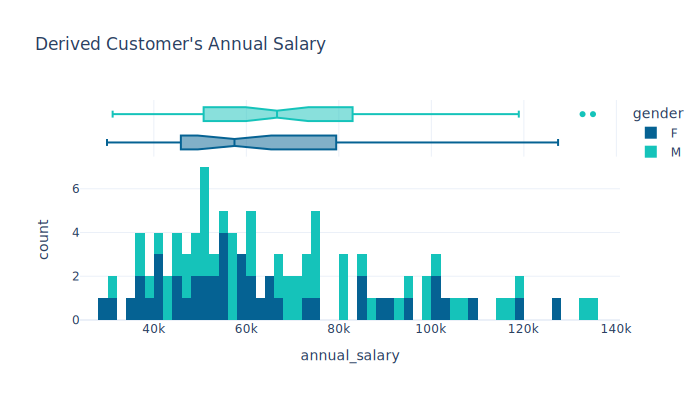

In [66]:
fig = px.histogram(df_annual_salary,
                   x='annual_salary',
                   template='plotly_white',
                   color='gender',
                   color_discrete_sequence=['#056293','#15C3BA'],
                   title='Annual Salary Data Distribution',
                   marginal="box",
                   nbins=100)

# fig.update_traces(marker_color='#15C3BA', 
#                   marker_line_color='white',
#                   marker_line_width=1.5,
#                   opacity=0.25)

fig.update_layout(title="Derived Customer's Annual Salary",height=400)

fig.show('svg',dpi=300)

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>ANNUAL SALARY STATISTICS</b>

Let's check the statistics for our calculated annual salary column

In [67]:
df_annual_salary['annual_salary'].describe()

count       100.000000
mean      67264.614406
std       25179.797984
min       29874.641667
25%       48056.536107
50%       60163.732000
75%       82336.618500
max      134946.236000
Name: annual_salary, dtype: float64

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>LINEAR CORRELATION</b>

Let's look at the pearson linear correlation for our newly created target variable labels

Feature Correlation to Target Variable


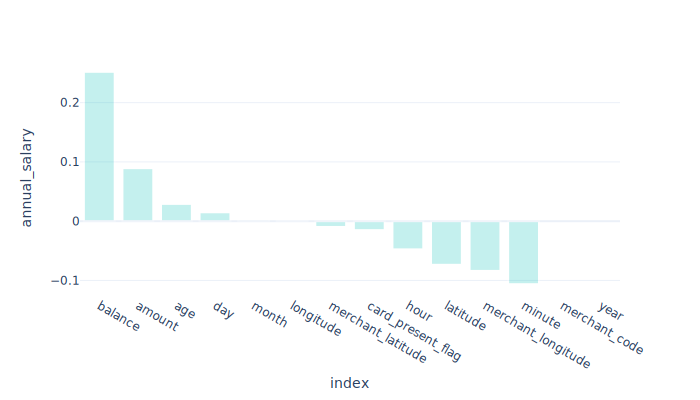

In [68]:
print('Feature Correlation to Target Variable')
corr_target = df.corr().loc[:,'annual_salary'].to_frame().sort_values(by='annual_salary',ascending=False).iloc[1:,:]

fig = px.bar(corr_target,y='annual_salary',
             template='plotly_white',height=400)
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.show('svg',dpi=300)

<div style=" background-color:#2da19b; padding: 8px 0px; border-radius: 8px; color: white">
    
<ul>
    <li>We can note that the most common salary is <b>50-51.99k AUD</b>, the highest being <b>134-135.99k AUD</b> and the lowest <b>28-29.99k AUD</b>
    <li>We can note that mean income for males is higher than for women</li>
    <li>We can see that annual salary is mainly correlated to user <b>balance</b></li>
</ul>
</div>

<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>8 ❯</span></b> <b>MODEL CONSTRUCTION APPROACHES</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>MODEL CONTRUCTION APPROACHES</b>

Having conducted an EDA, we know that our dataset contain transactions for both __debit__ (purchases) & __credit__ (salary income)

The __credit__ subset is important as we calculated the annual salary income based on these transaction in __section x__, now our goal will be to train a model that will be able to predict the annual salary for us based on a given set of features

We also found that our dataset contains transaction data for __100 customers__, which is quite a small number, and the __total number of transactions__ made by these users are around __12000__, both of which are quite contrasting numbers, so we need to think about how we will approach the problem:

<br>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>APPROACH 1</b>

<div style=" background-color:#056293 ; padding: 15px 15px; border-radius: 8px; color: white">
Utilise <b>customer_id</b> as indicies, which implies that we need to utilise <b>aggregate functions</b> in order to generate some features for each client (ie. mean transaction value etc), so our maximum number of rows will be limited by 100 customers. For each row we will have a corresponding <b>annual_income</b> value. Simpler models should work on such a dataset better than more complex models.
</div>

<br>

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>APPROACH 2</b>

<div style=" background-color:#056293 ; padding: 15px 15px; border-radius: 8px; color: white">
    Utilise <b>transaction</b> data as it is, ie. our target variable <b>annual_income</b> will be repeated for each <b>customer_id</b>, so we will have only 100 unique values, but on the other hand we have a much larger dataset to work with, which should help more advanced models like <b>decision_tree</b> gain insights into our data
</div>

<br>

We'll compare both methods and see which method would work best on this set of data

<br>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>9 ❯</span></b> <b>ANNUAL SALARY PREDICTION MODEL (AGGREGATE MODEL)</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯</span> ASSEMBLING FEATURE MATRIX</b>

#### **CLEANING**

- Most features in `df_annual_salary` are related to individual transactions, so let's remove all unnecessary features & start creating our features
- We have **three months** of data, `annual_salary` was created from **constant monthly payments** (as seen in **Section 6.1**)

#### **SALARY PAYMENT SIZE**

It's quite rational to assume that upon obtaining new data:
- We'll be able to calcualte **monthly income of a customer** (if payments vary each time, this can become a bit messy)
- Or we'll utilise a faster method; group all income & caclulate **statistics of income payments** for each month (mean income, median, standard deviation) [let's try this approach]


In [69]:
keep_features = ['age','customer_id','first_name','gender','bin_age','payment_period','annual_salary']

df_annual_salary = df_annual_salary[keep_features]
ldf = salary.groupby(['account','amount']).agg('mean').reset_index()
ldf.index = ldf['account']
amount = ldf[['amount']]
df_annual_salary = pd.concat([df_annual_salary,amount],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount
account,,,,,,,,
ACC-1037050564,40,CUS-1614226872,Rhonda,F,30-40,7 days,46516.121000,892.09
ACC-1199531521,52,CUS-134833760,Billy,M,50-60,14 days,98700.693000,3785.78
ACC-1222300524,38,CUS-2142601169,Michael,M,30-40,7 days,52253.921000,1002.13
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34
...,...,...,...,...,...,...,...,...
ACC-2270192619,20,CUS-2110742437,Darren,M,<20,0 days,39854.841667,3026.95
ACC-2673069055,24,CUS-51506836,Richard,M,20-30,31 days,73297.961667,6024.49
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>DEBIT TRANSACTION STATISTICS</b>

- Other possible relations to `annual_salary` are **<span style='color:#15C3BA'>number of purchases</span>**, **<span style='color:#15C3BA'>maximum purchase check</span>**, **<span style='color:#15C3BA'>mean check</span>** & **<span style='color:#15C3BA'>standard deviation</span>**  (ie. debit transactions statistics)
- We could look at each **each month** & **over a 3 month period** as well
- Suffice to say, statistics of debit purchases for each customer is quite straightforward to get, and should always be available

In [70]:
ldf = dict(tuple(df_deb.groupby(['month'])))

tdf_8 = ldf[8].groupby(['account']).agg(['mean','max','std'])['amount']
tdf_9 = ldf[9].groupby(['account']).agg(['mean','max','std'])['amount']
tdf_10 = ldf[10].groupby(['account']).agg(['mean','max','std'])['amount']

tdf_8.rename({'mean':'deb_mean_8','max':'deb_max_8','std':'deb_std_8'},axis=1,inplace=True)
tdf_9.rename({'mean':'deb_mean_9','max':'deb_max_9','std':'deb_std_9'},axis=1,inplace=True)
tdf_10.rename({'mean':'deb_mean_10','max':'deb_max_10','std':'deb_std_10'},axis=1,inplace=True)

tdf = pd.concat([tdf_8,tdf_9,tdf_10],axis=1)
df_annual_salary = pd.concat([df_annual_salary,tdf],axis=1)
df_annual_salary

# ldf['acc'] = ['_'.join(map(str, x)) for x in ldf.index] # conbine multindex w/ str-int

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10
account,,,,,,,,,,,,,,,,,
ACC-1037050564,40,CUS-1614226872,Rhonda,F,30-40,7 days,46516.121000,892.09,33.388214,235.36,35.297883,30.491935,172.57,26.171293,29.694348,154.96,23.876377
ACC-1199531521,52,CUS-134833760,Billy,M,50-60,14 days,98700.693000,3785.78,38.599032,145.00,35.912515,154.137273,1957.00,415.703382,67.948235,448.97,106.793297
ACC-1222300524,38,CUS-2142601169,Michael,M,30-40,7 days,52253.921000,1002.13,22.521333,104.13,23.141713,51.693200,2349.55,243.992340,34.725200,562.76,75.449247
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-2270192619,20,CUS-2110742437,Darren,M,<20,0 days,39854.841667,3026.95,23.476818,39.00,13.141787,26.549375,39.00,14.429842,37.260000,133.10,27.501024
ACC-2673069055,24,CUS-51506836,Richard,M,20-30,31 days,73297.961667,6024.49,28.439863,212.10,33.084646,50.773026,1910.00,217.685336,69.510341,1385.00,234.543076
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>CUSTOMER MONTHLY BALANCE</b>

- Next, we'll assume that there is a correlation between a customer's account <code>balance</code> and their <code>annual_salary</code>
- Their `balance` is tied to each transaction made, so let's also use statistics & extract the **mean**, **maximumum** & **minimum** for each month

In [71]:
ldf = dict(tuple(df.groupby(['month'])))

tdf_8 = ldf[8].groupby(['account']).agg(['mean','max','std'])['balance']
tdf_9 = ldf[9].groupby(['account']).agg(['mean','max','std'])['balance']
tdf_10 = ldf[10].groupby(['account']).agg(['mean','max','std'])['balance']

tdf_8.rename({'mean':'balance_mean_8','max':'balance_max_8','std':'balance_std_8'},axis=1,inplace=True)
tdf_9.rename({'mean':'balance_mean_9','max':'balance_max_9','std':'balance_std_9'},axis=1,inplace=True)
tdf_10.rename({'mean':'balance_mean_10','max':'balance_max_10','std':'balance_std_10'},axis=1,inplace=True)

tdf = pd.concat([tdf_8,tdf_9,tdf_10],axis=1)
df_annual_salary = pd.concat([df_annual_salary,tdf],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10,balance_mean_8,balance_max_8,balance_std_8,balance_mean_9,balance_max_9,balance_std_9,balance_mean_10,balance_max_10,balance_std_10
account,,,,,,,,,,,,,,,,,,,,,,,,,,
ACC-1037050564,40,CUS-1614226872,Rhonda,F,30-40,7 days,46516.121000,892.09,33.388214,235.36,35.297883,30.491935,172.57,26.171293,29.694348,154.96,23.876377,1922.881818,3060.28,555.263565,3681.143093,4465.56,360.313981,4548.033243,6065.02,541.994076
ACC-1199531521,52,CUS-134833760,Billy,M,50-60,14 days,98700.693000,3785.78,38.599032,145.00,35.912515,154.137273,1957.00,415.703382,67.948235,448.97,106.793297,5635.251471,10176.40,1755.272032,11069.767917,14490.97,1800.457675,17119.040526,20941.64,2719.366187
ACC-1222300524,38,CUS-2142601169,Michael,M,30-40,7 days,52253.921000,1002.13,22.521333,104.13,23.141713,51.693200,2349.55,243.992340,34.725200,562.76,75.449247,1192.015957,2279.63,698.429624,824.814231,2535.72,513.274340,1553.629714,2758.28,565.944574
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716,1257.452143,3001.96,811.697966,4107.230000,5514.14,723.591338,6013.780833,7005.72,592.253704
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517,4356.581429,6082.23,1940.063212,7671.293333,8809.04,1283.937311,10597.479722,12625.91,1153.819381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-2270192619,20,CUS-2110742437,Darren,M,<20,0 days,39854.841667,3026.95,23.476818,39.00,13.141787,26.549375,39.00,14.429842,37.260000,133.10,27.501024,8982.451739,9637.69,956.897717,11317.034706,11970.46,1117.972064,15860.922222,17475.73,2464.458785
ACC-2673069055,24,CUS-51506836,Richard,M,20-30,31 days,73297.961667,6024.49,28.439863,212.10,33.084646,50.773026,1910.00,217.685336,69.510341,1385.00,234.543076,15628.618378,17127.02,1779.188866,18639.625844,21158.28,2039.781241,15050.509205,17598.90,1826.804502
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611,6307.059375,8039.71,553.798730,8683.385882,10367.22,719.573161,10889.838276,12426.87,729.914479


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>MERCHANT SUBURB</b>

Next we'll assume that `merchant` may play a role in determining the customer's `annual_salary` as it provides us information about the **locality of the neighbourhood**
- We'll  assume that customers with **high annual income** will have debit transactions associated with merchants that are located in more prestige regions & visa versa
- We need some **form of ranking** for each `merchant_suburb`, so what we can do is group the data by `merchant_suburb` & find the **total speding ammount** at that particular merchant
- Once we have this data, let's associate **each customer with a particular merchant**, which they tend to **visit most often**, this is probably preferred over **one-hot-encoding**

In [72]:
# mean spending at marchant suburb; mapping dictionary
merchant_mean = df_deb.groupby(['merchant_suburb']).agg(['mean'])['amount']
smerchant_mean = merchant_mean['mean']
dict_merchant_mean = smerchant_mean.to_dict()

# Customer's spending at different merchant_suburbs (mean & max)
spending_mean = df_deb.groupby(['account','merchant_suburb']).agg('mean')['amount']
spending_mean = spending_mean.to_frame()
sortedv = spending_mean.sort_values(['account','amount'],ascending=False)

dict_most_common = {}
most_common = dict(tuple(sortedv.reset_index().groupby('account')))

dict_get = {}
for key,value in most_common.items():
    ldf = value.reset_index()
    mc = ldf.loc[0,'merchant_suburb']
    ci = ldf.loc[0,'account']
    dict_get[f'{ci}'] = mc
             
df_most_common = pd.DataFrame.from_dict(dict_get,orient='index',columns=['most_common_suburb'])

smc = df_most_common['most_common_suburb']
smc = smc.replace(dict_merchant_mean)
smc.name = 'most_common_suburb'
df_annual_salary = pd.concat([df_annual_salary,smc],axis=1)
df_annual_salary

,age,customer_id,first_name,gender,bin_age,payment_period,annual_salary,amount,deb_mean_8,deb_max_8,deb_std_8,deb_mean_9,deb_max_9,deb_std_9,deb_mean_10,deb_max_10,deb_std_10,balance_mean_8,balance_max_8,balance_std_8,balance_mean_9,balance_max_9,balance_std_9,balance_mean_10,balance_max_10,balance_std_10,most_common_suburb
ACC-1037050564,40,CUS-1614226872,Rhonda,F,30-40,7 days,46516.121000,892.09,33.388214,235.36,35.297883,30.491935,172.57,26.171293,29.694348,154.96,23.876377,1922.881818,3060.28,555.263565,3681.143093,4465.56,360.313981,4548.033243,6065.02,541.994076,99.307500
ACC-1199531521,52,CUS-134833760,Billy,M,50-60,14 days,98700.693000,3785.78,38.599032,145.00,35.912515,154.137273,1957.00,415.703382,67.948235,448.97,106.793297,5635.251471,10176.40,1755.272032,11069.767917,14490.97,1800.457675,17119.040526,20941.64,2719.366187,75.389048
ACC-1222300524,38,CUS-2142601169,Michael,M,30-40,7 days,52253.921000,1002.13,22.521333,104.13,23.141713,51.693200,2349.55,243.992340,34.725200,562.76,75.449247,1192.015957,2279.63,698.429624,824.814231,2535.72,513.274340,1553.629714,2758.28,565.944574,389.065000
ACC-1243371644,42,CUS-3904958894,Gregory,M,40-50,14 days,43841.193000,1681.58,50.357308,194.00,51.727674,59.077857,194.00,58.774096,72.540588,487.32,112.427716,1257.452143,3001.96,811.697966,4107.230000,5514.14,723.591338,6013.780833,7005.72,592.253704,367.622000
ACC-1279356312,44,CUS-1892177589,Tyler,M,40-50,14 days,75277.079000,2887.34,41.189091,229.56,53.265477,74.947442,1312.00,204.448822,38.732059,164.00,42.468517,4356.581429,6082.23,1940.063212,7671.293333,8809.04,1283.937311,10597.479722,12625.91,1153.819381,87.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACC-2270192619,20,CUS-2110742437,Darren,M,<20,0 days,39854.841667,3026.95,23.476818,39.00,13.141787,26.549375,39.00,14.429842,37.260000,133.10,27.501024,8982.451739,9637.69,956.897717,11317.034706,11970.46,1117.972064,15860.922222,17475.73,2464.458785,120.465000
ACC-2673069055,24,CUS-51506836,Richard,M,20-30,31 days,73297.961667,6024.49,28.439863,212.10,33.084646,50.773026,1910.00,217.685336,69.510341,1385.00,234.543076,15628.618378,17127.02,1779.188866,18639.625844,21158.28,2039.781241,15050.509205,17598.90,1826.804502,453.523333
ACC-2970114956,26,CUS-880898248,Robert,M,20-30,14 days,36668.917143,1433.98,47.651000,671.23,121.313856,36.030000,149.00,37.923272,32.910741,149.00,30.714611,6307.059375,8039.71,553.798730,8683.385882,10367.22,719.573161,10889.838276,12426.87,729.914479,92.855185
ACC-354106658,39,CUS-2376382098,Christine,F,30-40,0 days,119081.900000,5103.51,48.521463,284.92,49.512511,56.971091,773.99,104.597092,41.015263,177.00,36.799242,6542.289524,8754.76,1920.625024,10940.741228,15994.56,4479.481974,19729.020000,24135.54,4596.853797,119.842500


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>FEATURE CORRELATION TO TARGET VARIABLE</b>

Having created some features, let's take a look at the linear correlation of these features to the target variable
- We can note that `amount` has a correlation to the target variable (as expected)
- More surprisingly how high the correlation of **standard deviation** are to the target variable
- Bank **balance** & **spending** statistics, in contrast aren't as correlated, however a tendency still exists (perhaps the first four are too correlated)
- Likewise `most_common_suburb`, which represents a **spending ranking** of a particular `merchant suburb` at which the customer tended to spend the most), it seems like, the correlation suggest the opposite, higher salaries are associated with merchant suburbs of smaller ranking (however, the value is too small in magnitude for the statement to hold)

Feature Correlation to Target Variable


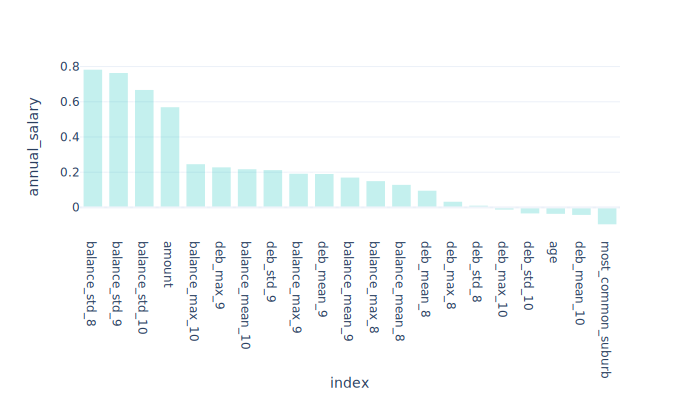

In [73]:
print('Feature Correlation to Target Variable')
corr_target = df_annual_salary.corr().loc[:,'annual_salary'].to_frame().sort_values(by='annual_salary',ascending=False).iloc[1:,:]

fig = px.bar(corr_target,y='annual_salary',
             template='plotly_white',height=400)
fig.update_traces(marker_line_width = 2,selector=dict(type="bar"))
fig.update_traces(marker_color='#15C3BA',
                  opacity=0.25)
fig.show('svg',dpi=300)

### <b><span style='color:#15C3BA;text-align:center'>★ </span>LINEAR REGRESSION MODEL</b>

As requested in **<span style='color:#15C3BA'>Section 1</span>**:

> - Build a simple regression model to predict the **<span style='color:#15C3BA'>annual salary</span>** for each customer using the attributes you identified above
> - How accurate is your model? Should ANZ use it to **<span style='color:#15C3BA'>segment customers</span>** (for whom it does not have this data) into brackets for reporting purposes?

At this stage our model would not be too viable to be rolled out in practice for the reasons given below:

- We can see that the `LinearRegression` model performs quite well, by no means optimal, and can be refined with additional feature creations loops
- We obtained an **<span style='color:#15C3BA'>RMSE of 5821 AUD</span>** for the **entire data model** & using train test splitting, the model was trained on a 70/30 distribution, the unseed test **<span style='color:#15C3BA'>RMSE was 8896 AUD</span>**
- As we saw in the **<span style='color:#15C3BA'>EDA</span>**, we have a lot of missing data for **higher age group demographic**, we would need more data from this age group in order to understand if we can utlilise such a model in practice
- Another important aspect is the **<span style='color:#15C3BA'>evaluation metric</span>**, it probably makes sence to optimise the model using **RMSLE** as opposed to **RMSE**, since the error for low income customers is too high

<br>


#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>FULL DATASET</b>


- We have a feature matrix to go on, let's see how well our `LinearRegression` model performs with the created dataset
- First, let's check how well the model works on the entire dataset; we'll train and predict `annual_salary` for all 100 customers
- For the evaluation metric, let's use `RMSE` and `R2` metric 

In [74]:
ann_sal = df_annual_salary.copy()
ann_sal = ann_sal.reset_index()
ann_sal.drop(['index'],axis=1,inplace=True)

y = ann_sal['annual_salary'].copy()
X = ann_sal.drop(['bin_age','annual_salary','payment_period',
                  'customer_id','first_name','gender'],axis=1)


X = X.fillna(X.mode().iloc[0])  # Fill NaN with most common in column
# print(X.isin([np.inf, -np.inf]).sum()) # check inf values

# # Create Linear Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as MSE

# Model on entire datasaet
model_lr = LinearRegression()
model_lr.fit(X,y)
ymodel = model_lr.predict(X)
print('1. Entire Dataset Model')
print(f'RMSE error: {MSE(y,ymodel,squared=False)}')
print(f'R2 error: {model_lr.score(X,y)}')

1. Entire Dataset Model
RMSE error: 5821.865187604693
R2 error: 0.9460011374652079


#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRAIN-TEST SPLIT</b>

Having only **100 data points**, it is not really feasible to do cross validation, so we'll resort to a **standard train-test splitting** validation approach

In [75]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

model_lr2 = LinearRegression()
model_lr2.fit(X_train,y_train)
ymodel = model_lr2.predict(X_train)
print('2. Train-test Dataset Model')
print(f'RMSE error (Train): {MSE(y_train,ymodel,squared=False)}')
print(f'R2 error (Train): {model_lr2.score(X_train,y_train)}')
ymodel = model_lr2.predict(X_test)
print(f'RMSE error (Test): {MSE(y_test,ymodel,squared=False)}')
print(f'R2 error (Test): {model_lr2.score(X_test,y_test)}')

2. Train-test Dataset Model
RMSE error (Train): 5247.255390421294
R2 error (Train): 0.9515737092554578
RMSE error (Test): 12987.90516182619
R2 error (Test): 0.7781537602705279


#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>CHECKING LINEAR WEIGHTS</b>

- `LinearRegression` allows us to check the individual weights of each feature, let's see which features are most important in the linear model
- The feature importance for the test_set model is quite interesting, `age` although showing very little **linear correlation** dependency is one of the most influential features
- As expected features with **standard deviation** statistics are important features in the model, as are **debit spending** features
- account `balance` on the other hand has very little influence on the model outcome

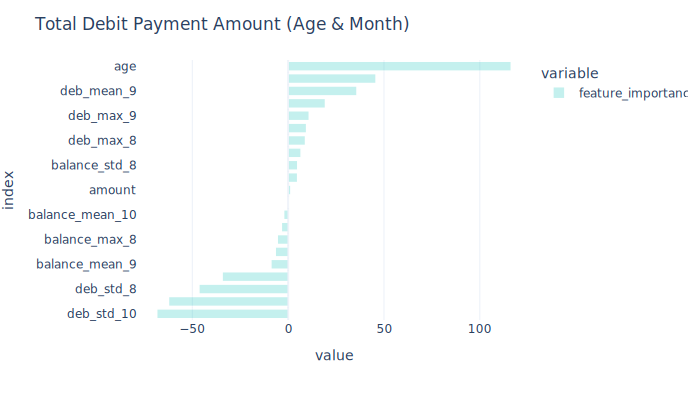

In [76]:
ldf = pd.DataFrame(model_lr2.coef_,index=X.columns)
ldf.columns = ['feature_importance']
fig = px.bar(ldf.sort_values('feature_importance',ascending=True),
             template='plotly_white',orientation='h') 
fig.update_traces(marker_color='#15C3BA', 
                  marker_line_color='white',
                  marker_line_width=1.5,
                  opacity=0.25)

fig.update_layout(title='Total Debit Payment Amount (Age & Month)',height=400)

fig.show('svg',dpi=300)

### <b><span style='color:#15C3BA;text-align:center'>★ </span>DECISION TREE REGRESSION MODEL</b>

As requested in **<span style='color:#15C3BA'>Section 1</span>**:

> - For a challenge: build a **<span style='color:#15C3BA'>decision tree based model</span>** to predict salary, does it perform better? How would you accurately test the performance of this model?

- We can see that `DecisionTreeRegressor` takes a little more effort to tune correctly, and performs worse than a simple `LinearRegression` model (which is not too uncommon)
- A possibe reason for this is the feature combination that we selected, by not means are they optimimal, and its likely we can train a better performing model if we create more meaningful features
- It is of course desirable to have more customer data available for training, so we can do a thorough cross validation

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>FULL DATASET</b>

- Decision Tree Models are able to achieve an RMSE error on the entire dataset of zero, given the depth is maximum
- Such models most probably overfit the dataset, and will not likely be able to perform well on new data

In [77]:
from sklearn.tree import DecisionTreeRegressor as DTR

model_dt = DTR()
model_dt.fit(X,y)
ymodel = model_dt.predict(X)
print('1. Entire Dataset Model')
print(f'RMSE error: {MSE(y,ymodel,squared=False)}')
print(f'R2 error: {model_dt.score(X,y)}')

1. Entire Dataset Model
RMSE error: 0.0
R2 error: 1.0


#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRAIN-TEST SPLIT</b>

- Decision Tree Models are able to achieve an RMSE error on the entire dataset of zero, given the depth is maximum
- Such models most probably overfit the dataset, and will not likely be able to perform well on new data

Let's split the dataset into two subsets & try to control the overfitting tendency of the model

Hyperparemeters of `DecisionTreeRegressor`

> - criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, 
> - min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
> - max_leaf_nodes=None, min_impurity_decrease=0.0, **ccp_alpha=0.0**)¶

We can control the tendency of the model, by focusing on two parameters <b><span style='color:#15C3BA'>max_depth</span></b> & <b><span style='color:#15C3BA'>ccp_alpha</span></b> 


In [78]:
# RMSE min = 6336 

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3)

lst_vals = [10,8,6,5,4,3,2,1]
dict_mdepth = {'test_vals':[]}
for vals in lst_vals:
    model_dt2 = DTR(max_depth=vals)
    model_dt2.fit(X_train,y_train)
    ymodel = model_dt2.predict(X_test)
    dict_mdepth['test_vals'].append(MSE(y_test,ymodel,squared=False))

In [79]:
dict_mdepth

{'test_vals': [22397.834453500967,
  24046.517535119776,
  21347.04601755413,
  22953.669485756112,
  22762.64405596027,
  21554.96407422506,
  19745.068706990598,
  18882.599350894117]}

Preventing overfitting using post-pruning:

> - The Post-pruning technique allows the decision tree model to grow to its full depth
> - Tree branches are then removed to prevent the model from overfitting
> - Cost complexity pruning (ccp) is one type of <b><span style='color:#15C3BA'>post-pruning technique</span></b>

In [80]:
path = model_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [81]:
ccp_alphas[:15]

array([   0.        ,    8.20525321,   12.44439766,  466.84663895,
        673.73791883,  710.83953778, 1080.78093021, 1408.64290676,
       1462.37300439, 2036.39376616, 2731.68482426, 2942.48991095,
       3105.76457998, 5432.97360774, 5710.4098375 ])

In [82]:
dict_ccp_alphas = {'test_vals':[]}
for ccp_alpha in ccp_alphas[:15]:
    model_dt2 = DTR(ccp_alpha=ccp_alpha)
    model_dt2.fit(X_train,y_train)
    ymodel = model_dt2.predict(X_test)
    dict_ccp_alphas['test_vals'].append(MSE(y_test,ymodel,squared=False))

In [83]:
print('RMSE w/ ccp_alpha parameter variation')
dict_mdepth

RMSE w/ ccp_alpha parameter variation


{'test_vals': [22397.834453500967,
  24046.517535119776,
  21347.04601755413,
  22953.669485756112,
  22762.64405596027,
  21554.96407422506,
  19745.068706990598,
  18882.599350894117]}

<div style=" background-color:#17202a; padding: 30px 10px 30px; border-radius: 8px; color: white;padding-right: 200px; padding-left: 30px">
    
<b>❮ <span style='color:#15C3BA;text-align:right'>CONCLUSION</span> START ❯</b>
    
<ul>
    <li>In section 9 we trained two models:</li>
        <ul>
        <li><b><span style='color:#15C3BA;text-align:center'>★ </span>LINEAR REGRESSION MODEL</b></li>
        <li><b><span style='color:#15C3BA;text-align:center'>★ </span>DECISION TREE REGRESSION MODEL</b></li>
        </ul>
    <li>The <b>linear model</b> showed the best generalisation performance with an RMSE of 7809 AUD</li>
    <li><b><span style='color:#15C3BA;text-align:right'>Maximum debit purchase size</span></b> and <b><span style='color:#15C3BA;text-align:right'>account balance deviations</span></b> are important features as found by the linear model</li>
       
</ul>
      
    
<b>❮ <span style='color:#15C3BA;text-align:right'>CONCLUSION</span> END ❯</b>
    
</div>

## <div style="padding: 30px;color:white;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a"><b><span style='color:#15C3BA'>10 ❯</span></b> <b>ANNUAL SALARY PREDICTION MODEL (TRANSACTION MODEL)</b></div>

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>LOAD DATA</b>

In our approach, we will be utilising time series data, however the problem will not be to predict time based predictions, nevertheless the time based features offer some useful insights 

As per EDA, we have quite a bit of missing data, let's do a simple cleanup but imputing them with 'nan' values

In [84]:
!wget https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/ANZ_internship/anz_data.csv

--2023-08-02 07:38:35--  https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/ANZ_internship/anz_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2797503 (2.7M) [text/plain]
Saving to: ‘anz_data.csv.1’

anz_data.csv.1      100%[===================>]   2.67M  --.-KB/s    in 0.08s   

2023-08-02 07:38:35 (34.7 MB/s) - ‘anz_data.csv.1’ saved [2797503/2797503]



In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_anz = pd.read_csv('/kaggle/working/anz_data.csv')
df_anz['date'] = pd.to_datetime(df_anz['date'])
df_anz['card_present_flag'] = df_anz['card_present_flag'].fillna('none')
df_anz = df_anz.drop(['merchant_code'],axis=1)
df_anz['merchant_id'] = df_anz['merchant_id'].fillna('none')
df_anz['merchant_latitude'] = df_anz['merchant_latitude'].fillna('none')
df_anz['merchant_longitude'] = df_anz['merchant_longitude'].fillna('none')
df_anz['merchant_state'] = df_anz['merchant_state'].fillna('none')
df_anz['merchant_suburb'] = df_anz['merchant_suburb'].fillna('none')
df_anz.drop(['transaction_id'],axis=1,inplace=True)
df_anz

,account,age,amount,balance,card_present_flag,customer_id,date,first_name,gender,latitude,longitude,merchant_id,merchant_latitude,merchant_longitude,merchant_state,merchant_suburb,movement,status,txn_description,bin_age,year,month,day,hour,minute,dow,payment_period,annual_salary
0,ACC-1598451071,26,16.25,35.39,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,81c48296-73be-44a7-befa-d053f48ce7cd,-27.99,153.38,QLD,Ashmore,debit,authorized,POS,20-30,2018,8,1,1,1,Wednesday,7 days,52855.650000
1,ACC-1598451071,26,14.19,21.20,0.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,830a451c-316e-4a6a-bf25-e37caedca49e,-33.87,151.21,NSW,Sydney,debit,authorized,SALES-POS,20-30,2018,8,1,1,13,Wednesday,7 days,52855.650000
2,ACC-1598451071,26,3.25,17.95,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,b4e02c10-0852-4273-b8fd-7b3395e32eb0,-28.06,153.44,QLD,Mermaid Beach,debit,authorized,SALES-POS,20-30,2018,8,1,1,51,Wednesday,7 days,52855.650000
3,ACC-1598451071,26,14.10,3.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,f2ef6270-cf91-409f-a6a2-fbd6735ea500,-28.63,153.6,NSW,Byron Bay,debit,authorized,POS,20-30,2018,8,1,8,9,Wednesday,7 days,52855.650000
4,ACC-1598451071,26,10.67,1006.85,1.0,CUS-2487424745,2018-08-01,Diana,F,-27.95,153.41,44abc19c-aa5c-40bd-b1d0-9b2f236189ea,-28.01,153.41,QLD,Bundall,debit,authorized,POS,20-30,2018,8,1,18,19,Wednesday,7 days,52855.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ACC-2153562714,24,3712.56,9707.77,none,CUS-423725039,2018-10-24,Linda,F,-31.88,116.00,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,10,24,14,0,Wednesday,30 days,45169.480000
12039,ACC-1217063613,27,4863.62,4863.86,none,CUS-1739931018,2018-09-26,Kimberly,F,-37.82,147.61,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,9,26,13,0,Wednesday,30 days,59174.043333
12040,ACC-1217063613,27,4863.62,8905.77,none,CUS-1739931018,2018-10-26,Kimberly,F,-37.82,147.61,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,10,26,13,0,Friday,30 days,59174.043333
12041,ACC-3100725361,25,6107.23,6111.57,none,CUS-2178051368,2018-09-26,Ronald,M,-17.03,145.73,none,none,none,none,none,credit,posted,PAY/SALARY,20-30,2018,9,26,15,0,Wednesday,30 days,74304.632000


### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>PIPELINE FUNCTIONS</b>

`sklearn` pipelines are a convenient way to keep code clean, let's write a few functions we'll use in the pipeline

- `extractSubset` will be used to extract the debit transactions only
- `mStandardScaler` will be used to scale all numeric features except for categorical and target variable
- `selectDtype` will be used to select column of particular type

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class selectDtype(BaseEstimator,TransformerMixin):
    
    def __init__(self,subset='numeric'):
        self.subset = subset
        
    def split_types(self,X,y=None):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  
        numeric = X.select_dtypes(include=numerics)
        categorical = X.select_dtypes(exclude=numerics)
        if(self.subset == 'numeric'):
            return numeric
        else:
            return categoric
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return self.split_types(X)

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
from copy import deepcopy

class extractSubset(BaseEstimator,TransformerMixin):
    
    def __init__(self,column,subset):
        self.column = column
        self.subset = subset
    
    def extract_data(self,X):
        return deepcopy(X[X[self.column]==self.subset])
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return self.extract_data(X)

In [88]:
from sklearn.base import BaseEstimator, TransformerMixin

class mStandardScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self,target):
        self.scaler = StandardScaler()
        self.target = target
        
    def split_types(self,X):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  
        numeric = X.select_dtypes(include=numerics)
        categorical = X.select_dtypes(exclude=numerics)
        return list(numeric.columns),list(categorical.columns)
    
    def fit(self, X, y=None):
        
        num,cat = self.split_types(X)
        if(self.target in num):
            num.remove(self.target)
            
        self.scaler.fit(X[num])
        X_sca = self.scaler.transform(X[num])
        self.X = pd.concat([X_sca,X[cat]],axis=1)
        self.X[self.target] = X[self.target]
        return self

    def transform(self, X, y=None):
        return self.X

### <b><span style='color:#15C3BA;text-align:center'>❯❯ </span>EVALUATION PIPELINE</b>

Now to the pipeline, for this problem we'll be utilising train/test splitting as per the section above
- We'll pass the dataframe containing all the data we need to build a model `df_anz` into the pipeline function `pipeline_tts`
- Then select the appropriate model we'll use to evaluate the generalisation performance using `model_id`

#### <b><span style='color:#15C3BA;text-align:center'>❯❯❯ </span>TRAIN-TEST SPLIT</b>

Generalisation performance is evaluated on 30% of the dataset (which is around 3000 transactions)

In [89]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")

def pipeline_tts(df,model_id='lr'):
    
    if(model_id == 'lr'):
        pipe = Pipeline([
                        ('scaler',mStandardScaler('annual_salary')),
                        ('debit',extractSubset('movement','debit')),
                        ('numeric_only',selectDtype('numeric')),
                        ])
        model = LinearRegression()
                             
    elif(model_id == 'dt'):
        pipe = Pipeline([
                        ('debit',extractSubset('movement','debit')),
                        ('numeric_only',selectDtype('numeric')),
                        ])
        model = DecisionTreeRegressor()
        
    # modified feature matrix
    df_mod = pipe.fit_transform(df)
    
    y = df_mod['annual_salary']
    X = df_mod.drop(['annual_salary'],axis=1)
    
    X_train,X_test, y_train, y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.3,
                                                       random_state=33)
    
    print(X_train.shape)
    print(X_test.shape)
    
    model.fit(X_train,y_train)
    train_predictions = model.predict(X_train)  
    train_RMSE = mean_squared_error(y_train, train_predictions)**0.5
    print(f'train RMSE: {train_RMSE}')
    
#   Predict output for X_test (unseen data)
    test_predictions = model.predict(X_test)   
    test_RMSE = mean_squared_error(y_test, test_predictions)**0.5
    print(f'test RMSE: {test_RMSE}')


### <b><span style='color:#15C3BA;text-align:center'>★ </span>LINEAR REGRESSION MODEL</b>

In section 9, our linear model worked quite well
- However on a larger dataset the model cannot capture the relation between the selected numerical features

In [90]:
pipeline_tts(df_anz,'lr')

(7812, 10)
(3348, 10)
train RMSE: 23069.738584275558
test RMSE: 23110.251012362507


### <b><span style='color:#15C3BA;text-align:center'>★ </span>DECISION TREE REGRESSION MODEL</b>

The `DecisionTree` model works quite well right out of the box, showing the smallest RMSE so far, without any feature engineering approaches, which is very promising.

We could have done a little more to obtain more relevant features, however an error of about 2500 AUD is quite good already for the model to be used in production

In [91]:
pipeline_tts(df_anz,'dt')

(7812, 10)
(3348, 10)
train RMSE: 6.478215270629375e-11
test RMSE: 2605.607549167667


<div style=" background-color:#17202a; padding: 30px 10px 30px; border-radius: 8px; color: white;padding-right: 200px; padding-left: 30px">
    
<b>❮ <span style='color:#15C3BA;text-align:right'>CONCLUSION</span> START ❯</b>
    
<ul>
    <li>In section 10 we trained two models:</li>
        <ul>
        <li><b><span style='color:#15C3BA;text-align:center'>★ </span>LINEAR REGRESSION MODEL</b></li>
        <li><b><span style='color:#15C3BA;text-align:center'>★ </span>DECISION TREE REGRESSION MODEL</b></li>
        </ul>     
</ul>
    <ul><li>The <b><span style='color:#15C3BA;text-align:right'>decision tree</span></b> model showed the best generalisation performance with an RMSE of 2494 AUD</li></ul>
      
    
<b>❮ <span style='color:#15C3BA;text-align:right'>CONCLUSION</span> END ❯</b>
    
</div>